In [208]:
import mne
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.svm import SVC
from yellowbrick.model_selection import RFECV
import random
import matplotlib.pyplot
%matplotlib inline
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

RWT
Regensburger Wortflüssigkeits-Test - fluidness of ideas & cognitive flexibilty

Reference:
Aschenbrenner, S., Tucha, O., Lange, K.L. (2000) Regensburger Wortflüssigkeits-Test. Hogrete.Verlag GmbH & Co. KG

Aim:
Assess semantic and categorical word fluency, as well as formal-lexical word fluency.

Task description:
S-word paradigm
Participants had 2 min. time to verbally list as many words as possible starting with the letter S.

Participants were instructed to include words that are in the DUDEN. No proper names and no repetition of words and stem were counted.


Animals paradigm
Participants had 2 min. time to verbally list as many animals as possible
Repetitions of stem were counted.


Column names in the csv file:

S-words<br>
RWT_1 = how many s-words did the participant name during the first minute (according to rules)<br>
RWT_2 = percentile rank of correct words for the subtest 's-words' (1 minute)<br>
RWT_3 = how many repetitions during the first minute<br>
RWT_4 = how many rule breaks during the first minute<br>
RWT_5 = how many s-words did the participant name during the second minute (according to rules)<br>
RWT_6 = how many repetitions during the second minute<br>
RWT_7 = how many rule breaks during the second minute<br>
RWT_8 = how many s-words did the pp. name in total (according to rules); two minutes<br>
RWT_9 = percentile rank of correct words for the subtest 's-words' (2 minutes)<br>
RWT_10 = how many repetitions in total; two minutes<br>
RWT_11 = how many rule breaks in total; two minutes<br>
RWT_12 = comments (s-words)<br>

Animals<br>
RWT_13 = how many animals did the participant. name in the first minute (according to rules)<br>
RWT_14 = percentile rank of correct words for the subtest 'animal' (1 minute)<br>
RWT_15 = how many repetitions during the first minute (animals)<br>
RWT_16 = how many rule breaks during the first minute (animals)<br>
RWT_17 = how many animals did the pp. name during the second minute (according to rules)<br>
RWT_18 = how many repetitions during the second minute (animals)<br>
RWT_19 = how many rule breaks during the second minute (animals)<br>
RWT_20 = how many animals did the pp. name in total (according to rules); two minutes<br>
RWT_21 = percentile rank of correct words for the subtest 'animals' (2 minutes)<br>
RWT_22 = how many repetitions in total; two minutes (animals)<br>
RWT_23 = how many rule breaks during the second minute (animals)<br>
RWT_24 = comments (animals)

In [209]:
#read RWT-file 
RWT = pd.read_csv('/Users/niklasgroiss/Desktop/Master HS Aalen/TextMining & Text Analytics /Cognitive_Test_Battery_LEMON/RWT/RWT.csv', sep = ',')
name_match = pd.read_csv('/Users/niklasgroiss/Desktop/Master HS Aalen/TextMining & Text Analytics /Cognitive_Test_Battery_LEMON/name_match.csv')


In [210]:
#Merge Files
RWT = RWT.merge(name_match, left_on= 'Unnamed: 0', right_on= 'INDI_ID')
RWT

,Unnamed: 0,RWT_1,RWT_2,RWT_3,RWT_4,RWT_5,RWT_6,RWT_7,RWT_8,RWT_9,...,RWT_17,RWT_18,RWT_19,RWT_20,RWT_21,RWT_22,RWT_23,RWT_24,Initial_ID,INDI_ID
0,sub-032311,18.0,67,1.0,0.0,12.0,1.0,0.0,30.0,69,...,23.0,1.0,0.0,57.0,96,1.0,0.0,NaN,sub-010017,sub-032311
1,sub-032309,15.0,42,0.0,0.0,3.0,1.0,0.0,18.0,17,...,8.0,0.0,0.0,32.0,20,1.0,0.0,NaN,sub-010015,sub-032309
2,sub-032382,20.0,80,0.0,0.0,7.0,0.0,0.0,27.0,61,...,18.0,1.0,0.0,41.0,55,1.0,0.0,NaN,sub-010100,sub-032382
3,sub-032302,14.0,35,0.0,0.0,5.0,2.0,0.0,19.0,24,...,16.0,0.0,0.0,43.0,61,0.0,0.0,NaN,sub-010003,sub-032302
4,sub-032315,16.0,51,0.0,0.0,12.0,0.0,0.0,28.0,55,...,16.0,0.0,0.0,46.0,73,1.0,0.0,NaN,sub-010022,sub-032315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,sub-032304,11.0,14,1.0,0.0,5.0,0.0,0.0,16.0,10,...,8.0,5.0,0.0,31.0,18,7.0,0.0,NaN,sub-010005,sub-032304
224,sub-032439,12.0,21,0.0,0.0,7.0,0.0,0.0,19.0,24,...,13.0,0.0,0.0,39.0,53,0.0,0.0,NaN,sub-010231,sub-032439
225,sub-032440,21.0,86,1.0,0.0,17.0,0.0,0.0,38.0,97,...,21.0,1.0,0.0,50.0,84,1.0,0.0,NaN,sub-010232,sub-032440
226,sub-032441,16.0,51,0.0,2.0,4.0,3.0,1.0,20.0,25,...,37.0,1.0,1.0,76.0,>99,1.0,1.0,NaN,sub-010233,sub-032441


In [211]:
#Match (Change Columns)
RWT.iloc[:,0] = RWT.iloc[:,25]
RWT

,Unnamed: 0,RWT_1,RWT_2,RWT_3,RWT_4,RWT_5,RWT_6,RWT_7,RWT_8,RWT_9,...,RWT_17,RWT_18,RWT_19,RWT_20,RWT_21,RWT_22,RWT_23,RWT_24,Initial_ID,INDI_ID
0,sub-010017,18.0,67,1.0,0.0,12.0,1.0,0.0,30.0,69,...,23.0,1.0,0.0,57.0,96,1.0,0.0,NaN,sub-010017,sub-032311
1,sub-010015,15.0,42,0.0,0.0,3.0,1.0,0.0,18.0,17,...,8.0,0.0,0.0,32.0,20,1.0,0.0,NaN,sub-010015,sub-032309
2,sub-010100,20.0,80,0.0,0.0,7.0,0.0,0.0,27.0,61,...,18.0,1.0,0.0,41.0,55,1.0,0.0,NaN,sub-010100,sub-032382
3,sub-010003,14.0,35,0.0,0.0,5.0,2.0,0.0,19.0,24,...,16.0,0.0,0.0,43.0,61,0.0,0.0,NaN,sub-010003,sub-032302
4,sub-010022,16.0,51,0.0,0.0,12.0,0.0,0.0,28.0,55,...,16.0,0.0,0.0,46.0,73,1.0,0.0,NaN,sub-010022,sub-032315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,sub-010005,11.0,14,1.0,0.0,5.0,0.0,0.0,16.0,10,...,8.0,5.0,0.0,31.0,18,7.0,0.0,NaN,sub-010005,sub-032304
224,sub-010231,12.0,21,0.0,0.0,7.0,0.0,0.0,19.0,24,...,13.0,0.0,0.0,39.0,53,0.0,0.0,NaN,sub-010231,sub-032439
225,sub-010232,21.0,86,1.0,0.0,17.0,0.0,0.0,38.0,97,...,21.0,1.0,0.0,50.0,84,1.0,0.0,NaN,sub-010232,sub-032440
226,sub-010233,16.0,51,0.0,2.0,4.0,3.0,1.0,20.0,25,...,37.0,1.0,1.0,76.0,>99,1.0,1.0,NaN,sub-010233,sub-032441


In [212]:
#Drop Proband because he wasn't focused.
RWT.drop(RWT.loc[RWT['RWT_24']=='participant did not seem to be focused on the task'].index, inplace=True)

#looking for NA Values
RWT.isna().any()

#Drop sub-032415 ( Matched sub-010199) because there just NA Values
RWT.drop(RWT.loc[RWT['Unnamed: 0']=='sub-010199'].index, inplace=True)


In [213]:
#Drop RWT_12 and RWT_24 because there are just comments
RWT_drop = RWT.drop('RWT_12', axis = 1)
RWT_drop2 = RWT_drop.drop('RWT_24', axis=1)
#Drop Initial_ID and INDI_ID
RWT_drop3 = RWT_drop2.drop(columns=['Initial_ID', 'INDI_ID'])
#RWT_drop4 = RWT_drop3.drop('RWT_9', axis=1)
RWT_drop3.to_csv('/Users/niklasgroiss/Desktop/Master HS Aalen/TextMining & Text Analytics /Cognitive_Test_Battery_LEMON/RWT_matched_final_test.csv')


In [214]:
RWT_m=pd.read_csv('/Users/niklasgroiss/Desktop/Master HS Aalen/TextMining & Text Analytics /Cognitive_Test_Battery_LEMON/RWT_matched_final_test.csv')
del RWT_m['Unnamed: 0']
RWT_m



,Unnamed: 0.1,RWT_1,RWT_2,RWT_3,RWT_4,RWT_5,RWT_6,RWT_7,RWT_8,RWT_9,...,RWT_14,RWT_15,RWT_16,RWT_17,RWT_18,RWT_19,RWT_20,RWT_21,RWT_22,RWT_23
0,sub-010017,18.0,67,1.0,0.0,12.0,1.0,0.0,30.0,69,...,92,0.0,0.0,23.0,1.0,0.0,57.0,96,1.0,0.0
1,sub-010015,15.0,42,0.0,0.0,3.0,1.0,0.0,18.0,17,...,52,1.0,0.0,8.0,0.0,0.0,32.0,20,1.0,0.0
2,sub-010100,20.0,80,0.0,0.0,7.0,0.0,0.0,27.0,61,...,41,0.0,0.0,18.0,1.0,0.0,41.0,55,1.0,0.0
3,sub-010003,14.0,35,0.0,0.0,5.0,2.0,0.0,19.0,24,...,65,0.0,0.0,16.0,0.0,0.0,43.0,61,0.0,0.0
4,sub-010022,16.0,51,0.0,0.0,12.0,0.0,0.0,28.0,55,...,78,1.0,0.0,16.0,0.0,0.0,46.0,73,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,sub-010005,11.0,14,1.0,0.0,5.0,0.0,0.0,16.0,10,...,48,2.0,0.0,8.0,5.0,0.0,31.0,18,7.0,0.0
222,sub-010231,12.0,21,0.0,0.0,7.0,0.0,0.0,19.0,24,...,61,0.0,0.0,13.0,0.0,0.0,39.0,53,0.0,0.0
223,sub-010232,21.0,86,1.0,0.0,17.0,0.0,0.0,38.0,97,...,72,0.0,0.0,21.0,1.0,0.0,50.0,84,1.0,0.0
224,sub-010233,16.0,51,0.0,2.0,4.0,3.0,1.0,20.0,25,...,99,0.0,0.0,37.0,1.0,1.0,76.0,>99,1.0,1.0


In [215]:
#Labels are RWT_8 and RWT_20
RWT_8= RWT_m.iloc[:,8]
RWT_20=RWT_m.iloc[:,19]
RWT_m.iloc[:,5:12]

,RWT_5,RWT_6,RWT_7,RWT_8,RWT_9,RWT_10,RWT_11
0,12.0,1.0,0.0,30.0,69,2.0,0.0
1,3.0,1.0,0.0,18.0,17,1.0,0.0
2,7.0,0.0,0.0,27.0,61,0.0,0.0
3,5.0,2.0,0.0,19.0,24,2.0,0.0
4,12.0,0.0,0.0,28.0,55,0.0,0.0
...,...,...,...,...,...,...,...
221,5.0,0.0,0.0,16.0,10,1.0,0.0
222,7.0,0.0,0.0,19.0,24,0.0,0.0
223,17.0,0.0,0.0,38.0,97,1.0,0.0
224,4.0,3.0,1.0,20.0,25,3.0,3.0


In [216]:
#splitt s-word table and animal table
s_word=RWT_m.iloc[:, :12]
animals=RWT_m.iloc[:, 12:]
Probanden = RWT_m[['Unnamed: 0.1']]
animals['Probanden']=Probanden
animals= animals[['Probanden','RWT_13', 'RWT_14', 'RWT_15', 'RWT_16', 'RWT_17', 'RWT_18', 'RWT_19', 'RWT_20', 'RWT_21', "RWT_22", 'RWT_23']]


,Unnamed: 0.1,RWT_1,RWT_2,RWT_3,RWT_4,RWT_5,RWT_6,RWT_7,RWT_8,RWT_9,RWT_10,RWT_11
0,sub-010017,18.0,67,1.0,0.0,12.0,1.0,0.0,30.0,69,2.0,0.0
1,sub-010015,15.0,42,0.0,0.0,3.0,1.0,0.0,18.0,17,1.0,0.0
2,sub-010100,20.0,80,0.0,0.0,7.0,0.0,0.0,27.0,61,0.0,0.0
3,sub-010003,14.0,35,0.0,0.0,5.0,2.0,0.0,19.0,24,2.0,0.0
4,sub-010022,16.0,51,0.0,0.0,12.0,0.0,0.0,28.0,55,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
221,sub-010005,11.0,14,1.0,0.0,5.0,0.0,0.0,16.0,10,1.0,0.0
222,sub-010231,12.0,21,0.0,0.0,7.0,0.0,0.0,19.0,24,0.0,0.0
223,sub-010232,21.0,86,1.0,0.0,17.0,0.0,0.0,38.0,97,1.0,0.0
224,sub-010233,16.0,51,0.0,2.0,4.0,3.0,1.0,20.0,25,3.0,3.0


# **Prediction RWT_8**

In [217]:
#get Top/lowest 40 scores for subset
to_work_with = list() 
for j in range(0, len(s_word)):
    label = s_word.iloc[j,8]
    #get subject name
    proband = s_word['Unnamed: 0.1'][j]
    if os.path.isfile('/Users/niklasgroiss/Desktop/Master HS Aalen/TextMining & Text Analytics /lemon_data/'+ proband + '.edf') == True:
        to_work_with.append(label)

sum_sorted = sorted(to_work_with)
print(sum_sorted)       
lower=sum_sorted[40]
upper=sum_sorted[-40]
print(sum_sorted[40])
print(sum_sorted[-40])

[9.0, 9.0, 10.0, 10.0, 11.0, 11.0, 12.0, 13.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 30.0, 30.0, 30.0, 30.0, 30.0,

Text(0, 0.5, 'Amount of Participants')

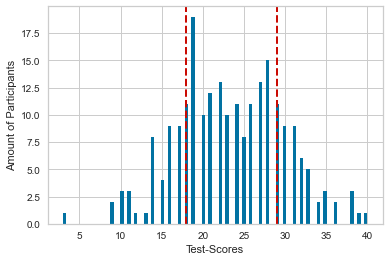

In [360]:
#Plot Histogram of RWT_8
plt.hist(RWT_8,bins=90)
plt.axvline(upper, color='r', linestyle='dashed', linewidth=2)
plt.axvline(lower, color='r', linestyle='dashed', linewidth=2)
plt.xlabel("Test-Scores")
plt.ylabel("Amount of Participants")

In [219]:
data_ges = pd.DataFrame()
for j in range(0, len(s_word)):
    
    label = s_word.iloc[j,8]
    
    #check if label in top/flop 40
    if label < upper and label > lower:
        print(label, 'is not in top or flop 40')
        continue

    #get subject name
    proband = s_word['Unnamed: 0.1'][j]
    
    #check if file available - don't forget to change the path!
    if os.path.isfile('/Users/niklasgroiss/Desktop/Master HS Aalen/TextMining & Text Analytics /lemon_data/'+ proband + '.edf') == False:
        print('No such file, Label:', label, 'Proband:', proband)
        continue
        
    if os.path.isfile('/Users/niklasgroiss/Desktop/Master HS Aalen/TextMining & Text Analytics /lemon_data/'+ proband + '.edf') == True:
        print('There is a file, Label:', label, 'Proband:', proband)
        
                
    #read EDF files- don't forget to change the path!
    raw = mne.io.read_raw_edf('/Users/niklasgroiss/Desktop/Master HS Aalen/TextMining & Text Analytics /lemon_data/'+ proband + '.edf', verbose = 0)

    #pick channels
    raw = raw.pick_channels([ "F5", "F3",  "VEOG"])
#"Fp1", "Fpz","AF1", "AFz","FT7", // "AF9", "AF7", "AF5", "AF3","F9", "F1",,  "Fz","F7""FC5","FC3",
    #add EEG Sensor positions
    montage = mne.channels.make_standard_montage('standard_1020')

    raw.set_montage(montage, on_missing= 'ignore')
    
    #Filtering
    raw.load_data()
    
    #noise removal
    raw.notch_filter(np.arange(50,100,50), filter_length='auto')
    
    # low pass filtering below 30 Hz
    raw.filter(None, 30., fir_design='firwin')
           
    # high pass filter to remove slow drifts
    raw.filter(.5, None, fir_design='firwin')
    

    # set up and fit the ICA
    ica = mne.preprocessing.ICA(n_components=3, random_state=97, max_iter=800, method = 'fastica', verbose = 0)
    ica.fit(raw)

    ica.exclude = []
    # find which ICs match the EOG pattern --- !also option to manually exclude the bad components!
    eog_indices, eog_scores = ica.find_bads_eog(raw, ch_name = 'VEOG')
    #select bad component
    ica.exclude = eog_indices

    #apply ICA
    ica.apply(raw)   
    
    #calculate PSD - you can also use other functions (from other packages) to compute Power Spectral Density 
    #or Fast Fourier Transform
    psd, freq = mne.time_frequency.psd_welch(raw, fmin = 0.5, fmax = 50, n_per_seg= 200)

    #save PSD in dataframe
    p = pd.DataFrame(psd)

    #calculate mean of channels --- !also option to use psd of every single sensor!
    p_mean = np.mean(p)
    
    #psd of every single sensor
    #df_proband = pd.DataFrame()
    #for sensor in range(len(p)):
     #  Data_sen = pd.DataFrame()
      #  Data_sen['Frequenz'] = freq
      #  Data_sen['psd'+str(sensor)] = p.iloc[sensor]


    #transpose the dataframe
    df_psd = pd.DataFrame([p_mean, freq]).T


    #calculate buckets between
    a = 0.5
    b = 1.5
    buckets = []
    for i in range(0, 20):
        row_lower = df_psd.loc[df_psd[1] > a]
        row_upper = row_lower.loc[row_lower[1] < b]
        bucket = sum(row_upper[0])
        buckets.append(bucket)

        a = a + 1
        b = b + 1

    df_buckets = pd.DataFrame(buckets).T
    
    
    
    #change label to 1 if it belongs to upper and to 0 if it belongs to lower

    if label >= upper:
        label = 1
    else:
        label = 0
    
    #append label
    df_buckets['label'] = int(label)
    
    #append data of every subject to final dataframe
    data_ges = data_ges.append(df_buckets)
    
    print(j, 'of', len(s_word), 'subjects')

There is a file, Label: 30.0 Proband: sub-010017
Transforming to ICA space (3 components)
Zeroing out 0 ICA components
Effective window size : 1.024 (s)
0 of 226 subjects
No such file, Label: 18.0 Proband: sub-010015
27.0 is not in top or flop 20%
19.0 is not in top or flop 20%
28.0 is not in top or flop 20%
There is a file, Label: 33.0 Proband: sub-010021
Transforming to ICA space (3 components)
Zeroing out 0 ICA components
Effective window size : 1.024 (s)
5 of 226 subjects
26.0 is not in top or flop 20%
There is a file, Label: 38.0 Proband: sub-010104
Transforming to ICA space (3 components)
Zeroing out 0 ICA components
Effective window size : 1.024 (s)
7 of 226 subjects
19.0 is not in top or flop 20%
24.0 is not in top or flop 20%
There is a file, Label: 15.0 Proband: sub-010019
Transforming to ICA space (3 components)
Zeroing out 0 ICA components
Effective window size : 1.024 (s)
10 of 226 subjects
28.0 is not in top or flop 20%
19.0 is not in top or flop 20%
There is a file, Labe

In [220]:
data_ges.to_csv('/Users/niklasgroiss/Desktop/Master HS Aalen/TextMining & Text Analytics /RWT/RWT_preprocessed_1.csv', header = None)

In [222]:
data_ges = pd.read_csv('/Users/niklasgroiss/Desktop/Master HS Aalen/TextMining & Text Analytics /RWT/RWT_preprocessed_1.csv', header = None)
data_ges = data_ges.iloc[:,2:]

In [251]:
#load sorted list for psd analysis
data_sort = pd.read_csv('/Users/niklasgroiss/Desktop/Master HS Aalen/TextMining & Text Analytics /RWT/RWT_sortiert.csv', header = None, sep=';')



,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.029241e-11,2.044095e-11,1.062821e-11,4.568809e-12,2.709764e-12,1.820242e-12,1.232008e-12,8.738544e-13,7.137604e-13,6.583097e-13,...,4.444856e-13,3.119169e-13,2.716365e-13,2.591993e-13,2.421981e-13,2.107056e-13,2.147687e-13,2.106862e-13,2.162216e-13,1.0
2,2.073546e-10,6.208751e-11,2.892223e-11,1.226343e-11,7.047854e-12,5.799533e-12,3.957667e-12,3.700637e-12,3.838804e-12,3.227864e-12,...,1.706881e-12,1.563449e-12,1.353834e-12,1.273439e-12,1.265229e-12,1.310223e-12,1.347406e-12,1.316281e-12,1.457414e-12,1.0
3,1.163493e-10,3.025321e-11,1.606614e-11,7.451741e-12,3.865603e-12,2.749872e-12,1.880257e-12,1.637519e-12,1.995461e-12,2.145065e-12,...,1.516395e-12,1.140902e-12,1.067041e-12,1.197216e-12,1.333719e-12,1.263551e-12,1.323531e-12,1.309936e-12,1.305643e-12,1.0
4,1.961149e-10,8.722621e-11,4.657293e-11,2.419245e-11,1.274862e-11,7.736123e-12,4.591854e-12,2.724483e-12,1.983131e-12,1.500754e-12,...,8.440341e-13,5.305154e-13,4.185184e-13,3.708924e-13,3.590763e-13,3.818236e-13,4.294041e-13,4.878264e-13,5.776848e-13,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,3.408510e-10,1.549522e-10,9.448127e-11,5.475800e-11,2.881236e-11,1.565472e-11,9.744460e-12,6.747578e-12,5.114420e-12,3.223838e-12,...,1.602896e-12,1.189423e-12,8.759600e-13,7.130484e-13,6.289240e-13,5.847885e-13,5.221190e-13,4.608444e-13,4.271097e-13,0.0
85,1.079099e-10,3.639961e-11,2.362875e-11,1.170201e-11,6.195348e-12,4.247149e-12,2.518584e-12,1.514608e-12,1.188398e-12,9.954155e-13,...,7.510797e-13,5.365996e-13,4.395332e-13,4.084471e-13,3.801686e-13,3.851198e-13,3.591220e-13,3.759006e-13,3.766720e-13,0.0
86,1.823362e-10,1.021344e-10,5.368908e-11,2.276639e-11,1.126709e-11,6.873918e-12,3.679403e-12,1.958373e-12,1.384766e-12,1.040860e-12,...,4.438215e-13,3.053746e-13,2.362460e-13,1.971919e-13,1.914398e-13,1.918097e-13,1.864304e-13,1.931696e-13,2.021938e-13,0.0
87,2.142296e-10,1.357864e-10,1.229765e-10,6.718786e-11,3.093705e-11,2.115598e-11,9.296595e-12,6.174046e-12,4.395350e-12,2.426398e-12,...,9.177561e-13,5.909631e-13,4.398077e-13,3.526330e-13,3.350140e-13,3.258040e-13,3.266901e-13,3.352184e-13,3.342697e-13,0.0


In [388]:
#data_sort=data_sort.drop([0], axis=0)
data_krank = data_sort.iloc[:47,:]
data_gesund = data_sort.iloc[47:,:]

In [309]:
#get psd important frequencies  
freq_4 =data_sort.iloc[47:,4]
freq_5 =data_sort.iloc[47:,5]
freq_6 =data_sort.iloc[47:,6]
freq_456 = freq_4+freq_5+freq_6
freq_456
freq_4_mci =data_sort.iloc[:47,4]
freq_5_mci =data_sort.iloc[:47,5]
freq_6_mci =data_sort.iloc[:47,6]
freq_456_mci = freq_4_mci+freq_5_mci+freq_6_mci


1     5.762014e-12
2     1.680505e-11
3     8.495732e-12
4     2.507659e-11
5     3.450398e-11
6     3.779334e-11
7     2.386181e-11
8     3.717733e-11
9     1.509176e-11
10    2.171948e-11
11    4.227359e-11
12    1.342243e-11
13    1.366936e-11
14    2.906310e-11
15    7.715692e-11
16    2.472033e-11
17    2.221055e-11
18    4.630663e-11
19    1.888248e-11
20    2.408169e-11
21    1.398438e-11
22    3.162220e-11
23    4.234660e-11
24    1.550047e-11
25    6.181296e-11
26    1.195515e-11
27    9.687557e-12
28    9.538290e-12
29    2.232478e-11
30    2.522697e-11
31    1.129874e-10
32    4.238004e-12
33    1.062589e-11
34    6.010202e-12
35    4.372019e-11
36    9.187976e-12
37    3.664731e-11
38    3.602883e-11
39    2.264553e-11
40    1.202620e-11
41    2.562376e-11
42    3.336257e-11
43    1.467106e-11
44    3.619041e-11
45    2.425899e-11
46    3.451661e-11
47    1.735652e-11
dtype: float64

In [357]:
#PSD for non-MCI freq 7.5-8.5Hz , 0.5-1.5Hz, 4.5-7.5Hz(s_word RF)
freq_7=data_sort.iloc[47:,7]
freq_0=data_sort.iloc[47:, 0]
freq_456=data_sort.iloc[47:,4:7]

#PSD for MCI freq 7.5-8.5Hz , 0.5-1.5Hz, 4.5-7.5Hz (s_word RF)
freq_7_mci=data_sort.iloc[:47,7]
freq_0_mci=data_sort.iloc[:47, 0]
freq_456_mci=data_sort.iloc[:47,4:7]

freq_7_ges=data_sort.iloc[:,7]
freq_0_ges=data_sort.iloc[:, 0]
freq_456_ges=data_sort.iloc[:,4] + data_sort.iloc[:,5] +data_sort.iloc[:,6]

print(freq_7_ges.mean()*10**11)
print(freq_0_ges.mean()*10**11)
print(freq_456_ges.mean()*10**11)

1.025592507746057
33.14481895394198
5.562380763539623


In [310]:
#Standarddeviations und Mean 
freq_0_std= freq_0.std()*(10**11)
freq_0_mci_std = freq_0_mci.std()*(10**11)
mean_freq_0 = freq_0.mean()*(10**11)
mean_freq_0_mci = freq_0_mci.mean()*(10**11)
print("sd freq_0:",freq_0_std)
print("sd freq_0_mci:",freq_0_mci_std)
print("Mean freq_0:",mean_freq_0)
print("Mean freq_0_mci:",mean_freq_0_mci)

freq_7_std= freq_7.std()*(10**11)
freq_7_mci_std = freq_7_mci.std()*(10**11)
mean_freq_7 = freq_7.mean()*(10**11)
mean_freq_7_mci = freq_7_mci.mean()*(10**11)
print("sd freq_7:",freq_7_std)
print("sd freq_7_mci:",freq_7_mci_std)
print("Mean freq_7:",mean_freq_7)
print("Mean freq_7_mci:",mean_freq_7_mci)

freq_456_std= freq_456.std()*(10**11)
freq_456_mci_std = freq_456_mci.std()*(10**11)
mean_freq_456 = freq_456.mean()*(10**11)
mean_freq_456_mci = freq_456_mci.mean()*(10**11)
print(freq_456_std)
print(freq_456_mci_std)
print(mean_freq_456)
print(mean_freq_456_mci)

sd freq_0: 161.3092078179899
sd freq_0_mci: 19.500341379363213
Mean freq_0: 50.08869561424352
Mean freq_0_mci: 18.36399037793425
sd freq_7: 5.940116174970221
sd freq_7_mci: 0.4215979221508489
Mean freq_7: 1.695742663911638
Mean freq_7_mci: 0.4409934353462952
26.618779966382586
1.9584906275438387
8.860302765562205
2.6854700809241807


In [301]:
print("Mean Frequenz 7:", freq_7.mean())
print("Mean Frequenz 0:", freq_0.mean())
print("Mean Frequenz 456:", freq_456.mean())

Mean Frequenz 7: 1.695742663911638e-11
Mean Frequenz 0: 5.008869561424352e-10
Mean Frequenz 456: 4    3.707673e-11
5    3.180347e-11
6    1.972283e-11
dtype: float64


In [291]:
import math
def cohensd(mean1, mean2, sd1, sd2, lenA, lenB):
    s = math.sqrt((((sd1**2)*lenA) + ((sd2**2)*lenB))/(lenA+lenB))
    res=(mean1-mean2)/s
    return res


In [312]:
#cohensd
cohensd_freq_0 = cohensd(mean_freq_0, mean_freq_0_mci, freq_0_std, freq_0_mci_std,41,47)
cohensd_freq_7 = cohensd(mean_freq_7, mean_freq_7_mci, freq_7_std, freq_7_mci_std,41,47)
cohensd_freq_456 = cohensd(mean_freq_456, mean_freq_456_mci, freq_456_std, freq_456_mci_std,41,47)

print('cohens D Freq 0:', cohensd_freq_0)
print('cohens D Freq 7:', cohensd_freq_7)
print('cohens D Freq 456:', cohensd_freq_456)

cohens D Freq 0: 0.2857460373765117
cohens D Freq 7: 0.30857524098133754
cohens D Freq 456: 0.3387997647838841


In [375]:

#splitting Features and Label
RWT_Features = data_ges.iloc[:, :19]   
RWT_labels = data_ges.iloc[:,-1]
RWT_Features


,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,2.044095e-11,1.062821e-11,4.568809e-12,2.709764e-12,1.820242e-12,1.232008e-12,8.738544e-13,7.137604e-13,6.583097e-13,6.181620e-13,4.444856e-13,3.119169e-13,2.716365e-13,2.591993e-13,2.421981e-13,2.107056e-13,2.147687e-13,2.106862e-13,2.162216e-13
1,6.208751e-11,2.892223e-11,1.226343e-11,7.047854e-12,5.799533e-12,3.957667e-12,3.700637e-12,3.838804e-12,3.227864e-12,2.535218e-12,1.706881e-12,1.563449e-12,1.353834e-12,1.273439e-12,1.265229e-12,1.310223e-12,1.347406e-12,1.316281e-12,1.457414e-12
2,3.025321e-11,1.606614e-11,7.451741e-12,3.865603e-12,2.749872e-12,1.880257e-12,1.637519e-12,1.995461e-12,2.145065e-12,2.270671e-12,1.516395e-12,1.140902e-12,1.067041e-12,1.197216e-12,1.333719e-12,1.263551e-12,1.323531e-12,1.309936e-12,1.305643e-12
3,2.361954e-11,1.409966e-11,6.996717e-12,4.452874e-12,3.404902e-12,2.227176e-12,1.574133e-12,1.210310e-12,1.061616e-12,9.961167e-13,8.253236e-13,7.074546e-13,7.232384e-13,7.630870e-13,8.506263e-13,9.286450e-13,9.645375e-13,1.014202e-12,1.003333e-12
4,5.179756e-11,3.361522e-11,1.729041e-11,8.240459e-12,6.946823e-12,4.529279e-12,3.078756e-12,2.868885e-12,1.921851e-12,1.095873e-12,7.827676e-13,5.596401e-13,4.629591e-13,4.060823e-13,4.061827e-13,3.895575e-13,4.016846e-13,4.889959e-13,4.601368e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1.021344e-10,5.368908e-11,2.276639e-11,1.126709e-11,6.873918e-12,3.679403e-12,1.958373e-12,1.384766e-12,1.040860e-12,7.499023e-13,4.438215e-13,3.053746e-13,2.362460e-13,1.971919e-13,1.914398e-13,1.918097e-13,1.864304e-13,1.931696e-13,2.021938e-13
84,1.357864e-10,1.229765e-10,6.718786e-11,3.093705e-11,2.115598e-11,9.296595e-12,6.174046e-12,4.395350e-12,2.426398e-12,1.473578e-12,9.177561e-13,5.909631e-13,4.398077e-13,3.526330e-13,3.350140e-13,3.258040e-13,3.266901e-13,3.352184e-13,3.342697e-13
85,9.659499e-11,4.412946e-11,2.517923e-11,1.352871e-11,1.328642e-11,7.701479e-12,5.815802e-12,6.215838e-12,5.656146e-12,2.996211e-12,3.338705e-12,3.864604e-12,1.947635e-12,1.106150e-12,8.136612e-13,6.081174e-13,5.139911e-13,4.308492e-13,3.946833e-13
86,2.131258e-10,1.259186e-10,6.847933e-11,4.295011e-11,2.666967e-11,1.631027e-11,1.078833e-11,7.815756e-12,5.630809e-12,3.621941e-12,2.498403e-12,2.371067e-12,2.286081e-12,2.102356e-12,1.506786e-12,1.007616e-12,7.040288e-13,4.912034e-13,4.073737e-13


# **Random Forest**

In [376]:
#make train-test split
X_train, X_test, y_train, y_test = train_test_split(RWT_Features, RWT_labels, test_size = 0.25, random_state = 20)

In [19]:
#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
RWT_Features_scaled = scaler.transform(RWT_Features)

In [20]:
#Convert to Dataframe for Genetic Algorithm
X_test= pd.DataFrame(X_test)
X_train= pd.DataFrame(X_train)

In [21]:
#Genetic Algorithm for Random Forest

#defining various steps required for the genetic algorithm
rf = RandomForestClassifier(n_estimators = 500, criterion = 'gini', random_state = 5, n_jobs = -1, min_samples_leaf=1, min_weight_fraction_leaf= 0.0, max_features="auto", bootstrap=True, oob_score=False, class_weight="balanced", max_samples=None)

def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        rf.fit(X_train.iloc[:,chromosome],y_train)
        predictions = rf.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [22]:
#Calculate best Accuracy of Random Forest
chromo,score=generations(size=200,n_feat=19,n_parents=100,mutation_rate=0.10,
                     n_gen=38,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
rf = RandomForestClassifier(n_estimators = 500, criterion = 'gini', random_state = 5, n_jobs = -1, min_samples_leaf=1, min_weight_fraction_leaf= 0.0, max_features="auto", bootstrap=True, oob_score=False, class_weight="balanced", max_samples=None)
rf.fit(X_train.iloc[:,chromo[-1]],y_train)
predictions = rf.predict(X_test.iloc[:,chromo[-1]])
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,predictions)))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions))
print('\n')

[0.9545454545454546, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9545454545454546, 0.9545454545454546]
[0.9545454545454546, 0.9545454545454546]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9545454545454546, 0.9545454545454546]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9545454545454546, 0.9545454545454546]
[0.9545454545454546, 0.9545454545454546]
[0.9090909090909091, 0.9090909090909091]
[0.9545454545454546, 0.9545454545454546]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9545454545454546, 0.9545454545454546]
[0.9090909090909091, 0.9090909090909091]
[0.9545454545454546, 0.9545454545454546]
[0.9545454545454546, 0.9545454545454546]
[0.9545454545454546, 0.9545454545454546]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9545454545454546, 0.9545454545454546]
[0.9545454545454

In [23]:
#get Feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
7,0.100329
0,0.097964
4,0.094469
6,0.090071
11,0.086035
9,0.085257
1,0.081678
10,0.078685
5,0.078348
8,0.073394


In [27]:
#Use Important Features to proof GA
Features_RF1 = data_ges.iloc[:, [7,0,4,6,11,9,1,10,5,8,2]] 
X_train, X_test, y_train, y_test = train_test_split(Features_RF1, RWT_labels, test_size = 0.25, random_state = 20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
#Proof GA rf II
rf = RandomForestClassifier(n_estimators = 500, criterion = 'gini', random_state = 5, n_jobs = -1, min_samples_leaf=1, min_weight_fraction_leaf= 0.0, max_features="auto", bootstrap=True, oob_score=False, class_weight="balanced", max_samples=None)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

print("=== Accuracy ===")
print(accuracy_score(y_test, predictions))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions))
print('\n')

=== Accuracy ===
0.9090909090909091
=== Confusion Matrix ===
[[ 9  1]
 [ 1 11]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.92      0.92      0.92        12

    accuracy                           0.91        22
   macro avg       0.91      0.91      0.91        22
weighted avg       0.91      0.91      0.91        22





In [29]:
#K-Fold-CV RF


cv_score = cross_val_score(rf, X_train, y_train, cv=10)

cv_score

np.mean(cv_score)

# Make cross validated predictions
predictions_CV_at = cross_val_predict(rf, X_train, y_train, cv=10)
predictions_CV_at

print("=== Accuracy ===")
print(accuracy_score(y_train, predictions_CV_at))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_train, predictions_CV_at))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_train, predictions_CV_at))
print('\n')

=== Accuracy ===
0.5757575757575758
=== Confusion Matrix ===
[[17 14]
 [14 21]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        31
           1       0.60      0.60      0.60        35

    accuracy                           0.58        66
   macro avg       0.57      0.57      0.57        66
weighted avg       0.58      0.58      0.58        66





# **k-Nearest-Neighbor**

In [225]:
#Prepare for GA kNN
X_train, X_test, y_train, y_test = train_test_split(RWT_Features, RWT_labels, test_size = 0.25, random_state = 20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_test= pd.DataFrame(X_test)
X_train= pd.DataFrame(X_train)


In [226]:
#GA for kNN
#defining various steps required for the genetic algorithm
Classifier = KNeighborsClassifier(n_neighbors=8, weights= 'uniform', algorithm= 'auto', p=3, )
scores_neigh = cross_val_score(Classifier, X_train, y_train, cv=10)

def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        Classifier.fit(X_train.iloc[:,chromosome],y_train)
        predictions = Classifier.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [227]:
#Calculate best result for kNN
chromo,score=generations(size=200,n_feat=19,n_parents=100,mutation_rate=0.10,
                     n_gen=38,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
Classifier = KNeighborsClassifier(n_neighbors=8, weights= 'uniform', algorithm= 'auto', p=3, )
scores_neigh = cross_val_score(Classifier, X_train, y_train, cv=10)
Classifier.fit(X_train.iloc[:,chromo[-1]],y_train)
predictions_KN_s = Classifier.predict(X_test.iloc[:,chromo[-1]])
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,predictions_KN_s)))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions_KN_s))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions_KN_s))
print('\n')

[0.8636363636363636, 0.8636363636363636]
[0.9545454545454546, 0.9545454545454546]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909091, 0.9090909090909091]
[0.9090909090909

Feature: 0, Score: 0.04545
Feature: 1, Score: 0.03636
Feature: 2, Score: 0.04545
Feature: 3, Score: 0.02424
Feature: 4, Score: 0.00909
Feature: 5, Score: -0.00909
Feature: 6, Score: 0.00606
Feature: 7, Score: 0.00909
Feature: 8, Score: 0.02121
Feature: 9, Score: 0.03333
Feature: 10, Score: 0.01515
Feature: 11, Score: 0.01212
Feature: 12, Score: 0.01212
Feature: 13, Score: 0.00909
Feature: 14, Score: 0.00606
Feature: 15, Score: 0.00909
Feature: 16, Score: 0.00606
Feature: 17, Score: -0.00000
Feature: 18, Score: 0.02121


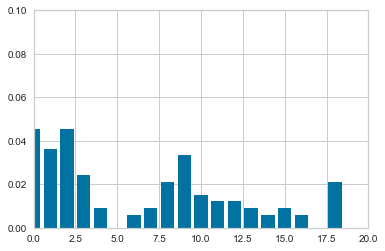

In [57]:
#Get Feature importances with Permutation Importance
Classifier.fit(X_train, y_train)
results = permutation_importance(Classifier, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.axis([0,20,0,0.1])
pyplot.show()

In [88]:
#Prepare for proofing GA
Features_knn1 = data_ges.iloc[:, [0,2,1,9,3,18,8,10,11,12,13,15,7,4,16,14,6]]
X_train, X_test, y_train, y_test = train_test_split(Features_knn1, RWT_labels, test_size = 0.25, random_state = 20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
#Proof of GA for KNN II 
#get scores
Classifier = KNeighborsClassifier(n_neighbors=8, weights= 'uniform', algorithm= 'auto', p=3, )
scores_neigh = cross_val_score(Classifier, X_train, y_train, cv=10)


#check model performance
Classifier.fit(X_train, y_train)
#score_nei = neigh.score(X_test, y_test)
predictions_KN_s = Classifier.predict(X_test)


print("===Score===")
#print(np.mean(score_nei))
scores_neigh 
print(np.mean(scores_neigh))

print("=== Accuracy ===")
print(accuracy_score(y_test, predictions_KN_s))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions_KN_s))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions_KN_s))
print('\n')

===Score===
0.607142857142857
=== Accuracy ===
0.7727272727272727
=== Confusion Matrix ===
[[9 1]
 [4 8]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.89      0.67      0.76        12

    accuracy                           0.77        22
   macro avg       0.79      0.78      0.77        22
weighted avg       0.80      0.77      0.77        22





In [90]:
#CV knn
cv_score = cross_val_score(Classifier, X_train, y_train, cv=10)

cv_score

np.mean(cv_score)

# Make cross validated predictions
predictions_CV_knn = cross_val_predict(Classifier, X_train, y_train, cv=10)
predictions_CV_knn

print("=== Accuracy ===")
print(accuracy_score(y_train, predictions_CV_knn))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_train, predictions_CV_knn))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_train, predictions_CV_knn))
print('\n')

=== Accuracy ===
0.6060606060606061
=== Confusion Matrix ===
[[22  9]
 [17 18]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.56      0.71      0.63        31
           1       0.67      0.51      0.58        35

    accuracy                           0.61        66
   macro avg       0.62      0.61      0.60        66
weighted avg       0.62      0.61      0.60        66





# **Multilayer Perceptron**

In [96]:
#Prepare for GA MLP
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(RWT_Features, RWT_labels, test_size = 0.25, random_state = 20)
scaler = StandardScaler()
X_train_i = scaler.fit_transform(X_train)
X_test_i = scaler.transform(X_test)

X_test= pd.DataFrame(X_test_i)
X_train= pd.DataFrame(X_train_i)
#y_train = pd.DataFrame(y_train_i)
#y_test = pd.DataFrame(y_test_i)

In [97]:
#GA for MLP
#defining various steps required for the genetic algorithm
mlp= MLPClassifier( hidden_layer_sizes=(13,13,13), max_iter=1500, random_state= 10, activation= 'relu', solver = 'adam', alpha= 0.0001, batch_size= 200, learning_rate='constant', learning_rate_init=0.099, shuffle= True, beta_1=0.9, n_iter_no_change=9)

def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        mlp.fit(X_train.iloc[:,chromosome],y_train)
        predictions = mlp.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [99]:
#Calculate best result for MLP with GA
chromo,score=generations(size=200,n_feat=17,n_parents=100,mutation_rate=0.10,
                     n_gen=38,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
mlp= MLPClassifier( hidden_layer_sizes=(13,13,13), max_iter=1500, random_state= 10, activation= 'relu', solver = 'adam', alpha= 0.0001, batch_size= 200, learning_rate='constant', learning_rate_init=0.099, shuffle= True, beta_1=0.9, n_iter_no_change=9)
scores_mlp = cross_val_score(mlp, X_train, y_train, cv=10)
mlp.fit(X_train.iloc[:,chromo[-1]],y_train)
y_pred = mlp.predict(X_test.iloc[:,chromo[-1]])
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,y_pred)))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.9090909090909091, 0.9090909090909091]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363

Feature: 0, Score: 0.08182
Feature: 1, Score: 0.04545
Feature: 2, Score: 0.06970
Feature: 3, Score: -0.00909
Feature: 4, Score: 0.07576
Feature: 5, Score: 0.01818
Feature: 6, Score: -0.00606
Feature: 7, Score: -0.01212
Feature: 8, Score: -0.01212
Feature: 9, Score: -0.00606
Feature: 10, Score: -0.01515
Feature: 11, Score: -0.00303
Feature: 12, Score: 0.02424
Feature: 13, Score: 0.04242
Feature: 14, Score: -0.00000
Feature: 15, Score: -0.02121
Feature: 16, Score: 0.02727


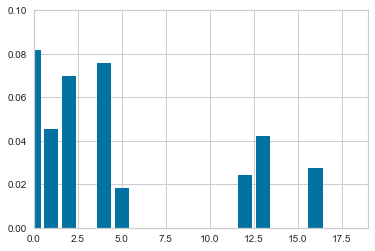

In [100]:
#Get Feature Importances with Permutation Impoartance
mlp.fit(X_train, y_train)
results4 = permutation_importance(mlp, X_train, y_train, scoring='accuracy')
# get importance
importance4 = results4.importances_mean
# summarize feature importance
for i,v in enumerate(importance4):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance4))], importance4)
pyplot.axis([0,19,0,0.1])
pyplot.show()

In [103]:
#Prepare for prrof of GA
Features_mlp = data_ges.iloc[:, [0,4,2,1,13,16,12]]

X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(Features_mlp, RWT_labels, test_size = 0.25, random_state = 20)

X_train_mlp = scaler.fit_transform(X_train_mlp)
X_test_mlp = scaler.transform(X_test_mlp)

In [104]:
#Proof of GA for MLP II


mlp= MLPClassifier(hidden_layer_sizes=(13,13,13),
  max_iter=1500, random_state= 10, activation= 'relu', solver = 'adam', alpha= 0.0001, batch_size= 200, learning_rate='constant', learning_rate_init=0.099, shuffle= True, beta_1=0.9, n_iter_no_change=9)

mlp.fit(X_train_mlp, y_train_mlp)

y_pred = mlp.predict(X_test_mlp)

print("=== Accuracy ===")
print(accuracy_score(y_test_mlp, y_pred))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test_mlp, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test_mlp, y_pred))
print('\n')

=== Accuracy ===
0.7272727272727273
=== Confusion Matrix ===
[[ 6  4]
 [ 2 10]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.71      0.83      0.77        12

    accuracy                           0.73        22
   macro avg       0.73      0.72      0.72        22
weighted avg       0.73      0.73      0.72        22





In [105]:
#CV MLP
cv_score = cross_val_score(mlp, X_test_mlp, y_test_mlp, cv=10)

cv_score

np.mean(cv_score)

# Make cross validated predictions
predictions_CV_mlp = cross_val_predict(mlp, X_test, y_test, cv=10)
predictions_CV_mlp

print("=== Accuracy ===")
print(accuracy_score(y_test, predictions_CV_mlp))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions_CV_mlp))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions_CV_mlp))
print('\n')

=== Accuracy ===
0.7727272727272727
=== Confusion Matrix ===
[[8 2]
 [3 9]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.82      0.75      0.78        12

    accuracy                           0.77        22
   macro avg       0.77      0.78      0.77        22
weighted avg       0.78      0.77      0.77        22





# **Support Vector Machine**

In [106]:
#Prepare for GA SVM
X_train, X_test, y_train, y_test = train_test_split(RWT_Features, RWT_labels, test_size = 0.25, random_state = 20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test= pd.DataFrame(X_test)
X_train= pd.DataFrame(X_train)

In [107]:
#GA for SVM
#defining various steps required for the genetic algorithm
clf =svm.SVC(kernel = 'linear', C=7, shrinking=True, probability=False, max_iter=100)

def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        clf.fit(X_train.iloc[:,chromosome],y_train)
        predictions = clf.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [109]:
#Get best result for GA SVM
chromo,score=generations(size=200,n_feat=19,n_parents=100,mutation_rate=0.10,
                     n_gen=38,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
clf =svm.SVC(kernel = 'linear', C=7, shrinking=True, probability=False, max_iter=100)
clf.fit(X_train.iloc[:,chromo[-1]],y_train)
predictions_svm = clf.predict(X_test.iloc[:,chromo[-1]])
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,predictions_svm)))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions_svm))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions_svm))
print('\n')

[0.7727272727272727, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727

Feature: 0, Score: 0.13030
Feature: 1, Score: 0.03939
Feature: 2, Score: 0.05455
Feature: 3, Score: -0.00909
Feature: 4, Score: 0.00606
Feature: 5, Score: 0.02424
Feature: 6, Score: 0.03939
Feature: 7, Score: 0.06970
Feature: 8, Score: 0.01818
Feature: 9, Score: 0.01515
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: -0.00606
Feature: 13, Score: 0.01818
Feature: 14, Score: 0.02424
Feature: 15, Score: 0.02424
Feature: 16, Score: -0.00303
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.07879


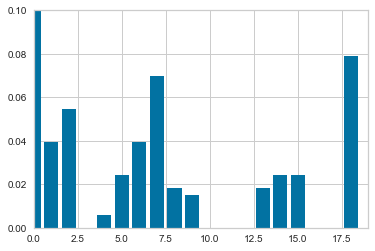

In [112]:
#get Feature importance with Permutation Importance
clf.fit(X_train,y_train)
results3 = permutation_importance(clf, X_train, y_train, scoring='accuracy')
# get importance
importance3 = results3.importances_mean
# summarize feature importance
for i,v in enumerate(importance3):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance3))], importance3)
pyplot.axis([0,19,0,0.1])
pyplot.show()

In [113]:
#Prepare for proof of GA SVM
Features_svm = data_ges.iloc[:, [0,18,7,2,1,6,5,14,15,13,8,9,4]] 

X_train, X_test, y_train, y_test= train_test_split(Features_svm, RWT_labels, test_size = 0.25, random_state = 20)

X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [114]:
#Proof of GA for Support Vector machine II

x= X_train
y = y_train
clf =svm.SVC(kernel = 'linear', C=7, shrinking=True, probability=False, max_iter=100)
clf.fit(x,y)
predictions_svm= clf.predict(X_test)
print("=== Accuracy ===")
print(accuracy_score(y_test, predictions_svm))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions_svm))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions_svm))
print('\n')

=== Accuracy ===
0.6818181818181818
=== Confusion Matrix ===
[[ 5  5]
 [ 2 10]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.67      0.83      0.74        12

    accuracy                           0.68        22
   macro avg       0.69      0.67      0.66        22
weighted avg       0.69      0.68      0.67        22





In [115]:
#CV svm
cv_score = cross_val_score(clf, X_train, y_train, cv=10)

cv_score

np.mean(cv_score)

# Make cross validated predictions
predictions_CV_svm = cross_val_predict(clf, X_train, y_train, cv=10)
predictions_CV_svm

print("=== Accuracy ===")
print(accuracy_score(y_train, predictions_CV_svm))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_train, predictions_CV_svm))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_train, predictions_CV_svm))
print('\n')

=== Accuracy ===
0.6060606060606061
=== Confusion Matrix ===
[[10 21]
 [ 5 30]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.67      0.32      0.43        31
           1       0.59      0.86      0.70        35

    accuracy                           0.61        66
   macro avg       0.63      0.59      0.57        66
weighted avg       0.63      0.61      0.57        66





# **Gaussian Process**

In [119]:
#Prepare for GA GPC
X_train, X_test, y_train, y_test = train_test_split(RWT_Features, RWT_labels, test_size = 0.25, random_state = 20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test= pd.DataFrame(X_test)
X_train= pd.DataFrame(X_train)

In [120]:
#GA GPC
#defining various steps required for the genetic algorithm
kernel= 1.0*RBF(1.0)
GPC = GaussianProcessClassifier(kernel=kernel,random_state=0, max_iter_predict=100).fit(X_test, y_test)

def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        GPC.fit(X_train.iloc[:,chromosome],y_train)
        predictions = GPC.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [122]:
#Get best result for GA GPC
chromo,score=generations(size=200,n_feat=19,n_parents=100,mutation_rate=0.10,
                     n_gen=38,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
kernel= 1.0*RBF(1.0)
GPC = GaussianProcessClassifier(kernel=kernel,random_state=0, max_iter_predict=100).fit(X_test, y_test)
GPC.fit(X_train.iloc[:,chromo[-1]],y_train)
predictions_GP = GPC.predict(X_test.iloc[:,chromo[-1]])
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,predictions_GP)))
print(accuracy_score(y_test, predictions_GP))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions_GP))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions_GP))
print('\n')

[0.8181818181818182, 0.8181818181818182]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8181818181818182, 0.8181818181818182]
[0.9090909090909091, 0.9090909090909091]
[0.9545454545454546, 0.9545454545454546]
[0.8181818181818182, 0.8181818181818182]
[0.8636363636363636, 0.8636363636363636]
[0.8181818181818182, 0.8181818181818182]
[0.9090909090909091, 0.9090909090909091]
[0.9545454545454546, 0.9545454545454546]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.9545454545454546, 0.9545454545454546]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8636363636363636, 0.8636363636363636]
[0.8181818181818182, 0.8181818181818182]
[0.8636363636363636, 0.8636363636363636]
[0.8181818181818

Feature: 0, Score: 0.01818
Feature: 1, Score: 0.02424
Feature: 2, Score: 0.02424
Feature: 3, Score: 0.02121
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00303
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00303
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00303
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: -0.00303


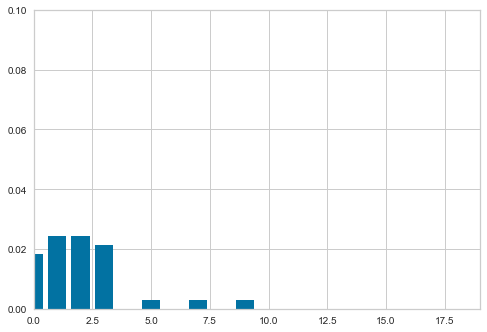

In [330]:
#Get Feature importance with Permutation Importance
results5 = permutation_importance(GPC, X_train, y_train, scoring='accuracy')
# get importance
importance5 = results5.importances_mean
# summarize feature importance
for i,v in enumerate(importance5):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance5))], importance5)
pyplot.axis([0,19,0,0.1])
pyplot.show()

In [133]:
#prepare for Proof GA GPC
Features_svm = data_ges.iloc[:, [1,2,3]] 

X_train, X_test, y_train, y_test= train_test_split(Features_svm, RWT_labels, test_size = 0.25, random_state = 20)

X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [134]:
#Proof of GA for GaussianProcessClassifier II

#with Train-Set
kernel= 1.0*RBF(1.0)
GPC = GaussianProcessClassifier(kernel=kernel,random_state=0, max_iter_predict=10).fit(X_train, y_train)

GPC.score(X_train, y_train)

predictions_GP =GPC.predict(X_test)
print("=== Accuracy ===")
print(accuracy_score(y_test, predictions_GP))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions_GP))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions_GP))
print('\n')
#print(np.mean(GPC.predict(X_test)))

=== Accuracy ===
0.7272727272727273
=== Confusion Matrix ===
[[ 4  6]
 [ 0 12]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.67      1.00      0.80        12

    accuracy                           0.73        22
   macro avg       0.83      0.70      0.69        22
weighted avg       0.82      0.73      0.70        22





In [135]:
#CV GPC
cv_score = cross_val_score(GPC, X_test, y_test, cv=10)

cv_score

np.mean(cv_score)

# Make cross validated predictions
predictions_CV_gpc = cross_val_predict(GPC, X_train, y_train, cv=10)
predictions_CV_gpc

print("=== Accuracy ===")
print(accuracy_score(y_train, predictions_CV_gpc))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_train, predictions_CV_gpc))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_train, predictions_CV_gpc))
print('\n')

=== Accuracy ===
0.5151515151515151
=== Confusion Matrix ===
[[ 8 23]
 [ 9 26]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.47      0.26      0.33        31
           1       0.53      0.74      0.62        35

    accuracy                           0.52        66
   macro avg       0.50      0.50      0.48        66
weighted avg       0.50      0.52      0.48        66





# **XGBoost**

In [136]:
#Prepare for GA XGB
X_train, X_test, y_train, y_test = train_test_split(RWT_Features, RWT_labels, test_size = 0.25, random_state = 20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test= pd.DataFrame(X_test)
X_train= pd.DataFrame(X_train)

In [137]:
#GA XGB
#defining various steps required for the genetic algorithm
model = XGBClassifier(booster='gbtree', eta= 0.01, gamma= 5, max_depth=6, min_child_weight= 4)

def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        model.fit(X_train.iloc[:,chromosome],y_train)
        predictions = model.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [139]:
#Get best result for GA XGB
chromo,score=generations(size=200,n_feat=19,n_parents=100,mutation_rate=0.10,
                     n_gen=38,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model = XGBClassifier(booster='gbtree', eta= 0.01, gamma= 5, max_depth=6, min_child_weight= 4)
model.fit(X_train.iloc[:,chromo[-1]],y_train)
predictions = model.predict(X_test.iloc[:,chromo[-1]])
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,predictions)))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions))
print('\n')

[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818182, 0.8181818181818182]
[0.8181818181818

Feature: 0, Score: 0.06667
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.07879
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.08182
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.24242
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000


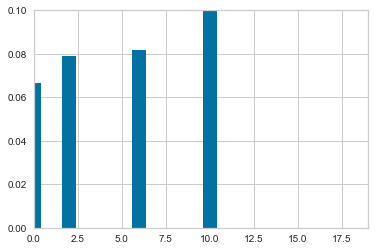

In [141]:
#Get Feature importance with Permutation importance
model.fit(X_train,y_train)
results6 = permutation_importance(model, X_train, y_train, scoring='accuracy')
# get importance
importance6 = results6.importances_mean
# summarize feature importance
for i,v in enumerate(importance6):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance6))], importance6)
pyplot.axis([0,19,0,0.1])
pyplot.show()

In [142]:
#get feature importance with Feature impoartance function
feature_importances = pd.DataFrame(model.feature_importances_, columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

    importance
2     0.272099
0     0.269721
6     0.237324
10    0.220856
11    0.000000
17    0.000000
16    0.000000
15    0.000000
14    0.000000
13    0.000000
12    0.000000
9     0.000000
1     0.000000
8     0.000000
7     0.000000
5     0.000000
4     0.000000
3     0.000000
18    0.000000


In [143]:
#Prepare for proof of GA
Features_xgb = data_ges.iloc[:, [2, 0, 6, 10 ]] 

X_train, X_test, y_train, y_test= train_test_split(Features_xgb, RWT_labels, test_size = 0.25, random_state = 20)

X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [144]:
#Proof of GA for XGboost II


model = XGBClassifier(booster='gbtree', eta= 0.01, gamma= 5, max_depth=6, min_child_weight= 4)
model.fit(X_train, y_train)
y_pred_xg = model.predict(X_test)
predictions_XG = [round(value) for value in y_pred_xg]

print("=== Accuracy ===")
print(accuracy_score(y_test, predictions_XG))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions_XG))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions_XG))
print('\n')

=== Accuracy ===
0.8181818181818182
=== Confusion Matrix ===
[[9 1]
 [3 9]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.90      0.75      0.82        12

    accuracy                           0.82        22
   macro avg       0.82      0.82      0.82        22
weighted avg       0.83      0.82      0.82        22





In [145]:
#CV XGBoost
cv_score = cross_val_score(model, X_train, y_train, cv=10)

cv_score

np.mean(cv_score)

# Make cross validated predictions
predictions_CV_xgb = cross_val_predict(model, X_train, y_train, cv=10)
predictions_CV_xgb

print("=== Accuracy ===")
print(accuracy_score(y_train, predictions_CV_xgb))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_train, predictions_CV_xgb))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_train, predictions_CV_xgb))
print('\n')

=== Accuracy ===
0.5757575757575758
=== Confusion Matrix ===
[[14 17]
 [11 24]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        31
           1       0.59      0.69      0.63        35

    accuracy                           0.58        66
   macro avg       0.57      0.57      0.57        66
weighted avg       0.57      0.58      0.57        66





# **Stacking**

In [146]:
#Try Stacking to improve accuracys
X_train, X_test, y_train, y_test = train_test_split(RWT_Features, RWT_labels, test_size = 0.25, random_state = 20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [147]:
#Stacking
def get_models():
    models = dict()
    models["RF"]= RandomForestClassifier(n_estimators = 500, criterion = 'gini', random_state = 5, n_jobs = -1, min_samples_leaf=1, min_weight_fraction_leaf= 0.0, max_features="auto", bootstrap=True, oob_score=False, class_weight="balanced", max_samples=None).fit(X_train, y_train)
    models["knn"]= KNeighborsClassifier(n_neighbors=8, weights= 'uniform', algorithm= 'auto', p=3,)
    models["SVM"]= SVC(kernel = 'linear', C=6, shrinking=True, probability=False, max_iter=1000).fit(X_train, y_train)
    models["MLP"]= MLPClassifier(hidden_layer_sizes =(13,13,13),max_iter=1500, random_state= 10, activation= 'relu', solver = 'adam', alpha= 0.0001, batch_size= 200, learning_rate='constant', learning_rate_init=0.099, shuffle= True, beta_1=0.9, n_iter_no_change=9)
    models["GPC"]= GaussianProcessClassifier(kernel=kernel,random_state=0, max_iter_predict=100).fit(X_train, y_train)
    return models


In [148]:
def evaluate_model(model, RWT_Features, RWT_labels):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
	scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

>RF 0.636 (0.096)
>knn 0.559 (0.095)
>SVM 0.553 (0.107)
>MLP 0.544 (0.101)
>GPC 0.501 (0.104)


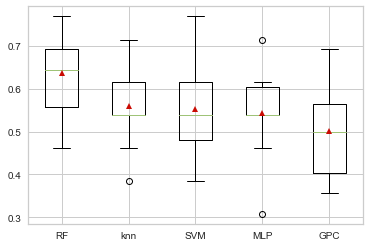

In [149]:
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from matplotlib import pyplot
# define dataset
#X_train, y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, RWT_Features, RWT_labels)
	results.append(scores)
	names.append(name)
    
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [150]:
models = [
RandomForestClassifier(n_estimators = 500, criterion = 'gini', random_state = 5, n_jobs = -1, min_samples_leaf=1, min_weight_fraction_leaf= 0.0, max_features="auto", bootstrap=True, oob_score=False, class_weight="balanced", max_samples=None),
KNeighborsClassifier(n_neighbors=8, weights= 'uniform', algorithm= 'auto', p=3,),
SVC(kernel = 'linear', C=6, shrinking=True, probability=False, max_iter=1000),
MLPClassifier(hidden_layer_sizes =(13,13,13),max_iter=1500, random_state= 10, activation= 'relu', solver = 'adam', alpha= 0.0001, batch_size= 200, learning_rate='constant', learning_rate_init=0.099, shuffle= True, beta_1=0.9, n_iter_no_change=9),
GaussianProcessClassifier(kernel=kernel,random_state=0, max_iter_predict=100)
]

In [151]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from vecstack import stacking

S_train, S_test = stacking(models, 
                            X_train, y_train, X_train, 
                            regression=False,
                            mode='oof_pred_bag',
                            needs_proba=False,
                            save_dir=None,
                            metric=accuracy_score,
                            n_folds=10,
                            stratified=True,
                            shuffle=True,
                            random_state=10,
                            verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [RandomForestClassifier]
    fold  0:  [0.85714286]
    fold  1:  [0.42857143]
    fold  2:  [0.42857143]
    fold  3:  [0.57142857]
    fold  4:  [0.57142857]
    fold  5:  [0.57142857]
    fold  6:  [0.50000000]
    fold  7:  [0.50000000]
    fold  8:  [0.83333333]
    fold  9:  [0.33333333]
    ----
    MEAN:     [0.55952381] + [0.16016219]
    FULL:     [0.56060606]

model  1:     [KNeighborsClassifier]
    fold  0:  [0.85714286]
    fold  1:  [0.42857143]
    fold  2:  [0.57142857]
    fold  3:  [0.42857143]
    fold  4:  [0.57142857]
    fold  5:  [0.57142857]
    fold  6:  [0.33333333]
    fold  7:  [0.33333333]
    fold  8:  [0.50000000]
    fold  9:  [1.00000000]
    ----
    MEAN:     [0.55952381] + [0.20571484]
    FULL:     [0.56060606]

model  2:     [SVC]
    fold  0:  [0.42857143]
    fold  1:  [0.28571429]
    fold  2:  [0.5714285

In [33]:
#Get result of stacking
nan=None
model1 = RandomForestClassifier(n_estimators = 500, criterion = 'gini', random_state = 5, n_jobs = -1, min_samples_leaf=1, min_weight_fraction_leaf= 0.0, max_features="auto", bootstrap=True, oob_score=False, class_weight="balanced", max_samples=None)

model1 = model1.fit(S_train, y_train)
scores_st = cross_val_score(model1, S_train, y_train, cv=10)
y_pred_st = cross_val_predict(model1, S_train, y_train, cv=10)
print('Final prediction score:[%.8f]' %accuracy_score(y_train, y_pred_st))
print(confusion_matrix(y_train, y_pred_st))

print(classification_report(y_train, y_pred_st))

Final prediction score:[0.56060606]
[[17 14]
 [15 20]]
              precision    recall  f1-score   support

           0       0.53      0.55      0.54        31
           1       0.59      0.57      0.58        35

    accuracy                           0.56        66
   macro avg       0.56      0.56      0.56        66
weighted avg       0.56      0.56      0.56        66



# **Prediction für RWT_20**

In [362]:
#define borders for Impaired or not
to_work_with_2 = list() 
for j in range(0, len(animals)):
    label = animals.iloc[j,8]
    #get subject name
    proband = animals['Probanden'][j]
    if os.path.isfile('/Users/niklasgroiss/Desktop/Master HS Aalen/TextMining & Text Analytics /lemon_data/'+ proband + '.edf') == True:
        to_work_with_2.append(label)

sum_sorted = sorted(to_work_with_2)
print(sum_sorted)       
lower=sum_sorted[40]
upper=sum_sorted[-40]
print(sum_sorted[40])
print(sum_sorted[-40])

[18.0, 21.0, 21.0, 21.0, 23.0, 23.0, 23.0, 24.0, 24.0, 24.0, 25.0, 26.0, 26.0, 26.0, 26.0, 27.0, 27.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 29.0, 29.0, 29.0, 29.0, 29.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 37.0, 37.0, 37.0, 37.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 42.0, 42.0, 42.0, 42.0, 42.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 44.0, 44.0, 44.0, 44.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 46.0, 46.0, 46.0, 46.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 48.0, 48.0, 49.0, 49.

Text(0, 0.5, 'Amount of Participants')

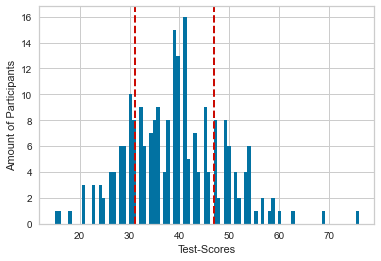

In [363]:
#Plot histogram of RWT_20
plt.hist(RWT_20,bins=90)
plt.axvline(upper, color='r', linestyle='dashed', linewidth=2)
plt.axvline(lower, color='r', linestyle='dashed', linewidth=2)
plt.xlabel("Test-Scores")
plt.ylabel("Amount of Participants")

In [18]:
data_ges1 = pd.DataFrame()
for j in range(0, len(animals)):
    
    label = animals.iloc[j,8]
    
    #check if label in top/flop 20%
    if label < upper and label > lower:
        print(label, 'is not in top or flop 40')
        continue

    #get subject name
    proband = animals['Probanden'][j]
    
    #check if file available - don't forget to change the path!
    if os.path.isfile('/Users/niklasgroiss/Desktop/Master HS Aalen/TextMining & Text Analytics /lemon_data/'+ proband + '.edf') == False:
        print('No such file, Label:', label, 'Proband:', proband)
        continue
        
    if os.path.isfile('/Users/niklasgroiss/Desktop/Master HS Aalen/TextMining & Text Analytics /lemon_data/'+ proband + '.edf') == True:
        print('There is a file, Label:', label, 'Proband:', proband)

    

    #read EDF files- don't forget to change the path!
    raw = mne.io.read_raw_edf('/Users/niklasgroiss/Desktop/Master HS Aalen/TextMining & Text Analytics /lemon_data/'+ proband + '.edf', verbose = 0)

    #pick channels
    #raw = raw.pick_channels(["AF9", "AF7", "AF5", "AF3","F9", "F7", "F5", "F3", "F1", "Fz","FT7", "FC5", "VEOG"])
    raw = raw.pick_channels([ "F5", "F3",  "VEOG"])
    
    #add EEG Sensor positions
    montage = mne.channels.make_standard_montage('standard_1020')

    raw.set_montage(montage, on_missing= 'ignore')
    

    #Filtering
    raw.load_data()
    # low pass filtering below 50 Hz
    raw.filter(None, 30., fir_design='firwin')
           
    # high pass filter to remove slow drifts
    raw.filter(.5, None, fir_design='firwin')
    
    #noise removal
    raw.notch_filter(np.arange(50,100,50), filter_length='auto')

    # set up and fit the ICA
    ica = mne.preprocessing.ICA(n_components=3, random_state=97, max_iter=800, method = 'fastica', verbose = 0)
    ica.fit(raw)

    ica.exclude = []
    # find which ICs match the EOG pattern --- !also option to manually exclude the bad components!
    eog_indices, eog_scores = ica.find_bads_eog(raw, ch_name = 'VEOG')
    #select bad component
    ica.exclude = eog_indices

    #apply ICA
    ica.apply(raw)

    #calculate PSD - you can also use other functions (from other packages) to compute Power Spectral Density 
    #or Fast Fourier Transform
    psd, freq = mne.time_frequency.psd_welch(raw, fmin = 0.5, fmax = 50, n_per_seg= 200)

    #save PSD in dataframe
    p = pd.DataFrame(psd)

    #calculate mean of channels --- !also option to use psd of every single sensor!
    p_mean = np.mean(p)

    #transpose the dataframe
    df_psd = pd.DataFrame([p_mean, freq]).T


    #calculate buckets between
    a = 0.5
    b = 1.5
    buckets = []
    for i in range(0, 20):
        row_lower = df_psd.loc[df_psd[1] > a]
        row_upper = row_lower.loc[row_lower[1] < b]
        bucket = sum(row_upper[0])
        buckets.append(bucket)

        a = a + 1
        b = b + 1

    df_buckets = pd.DataFrame(buckets).T
    
    
    
    #change label to 1 if it belongs to upper and to 0 if it belongs to lower

    if label >= upper:
        label = 1
    else:
        label = 0
    
    #append label
    df_buckets['label'] = int(label)
    
    #append data of every subject to final dataframe
    data_ges1 = data_ges1.append(df_buckets)
    
    print(j, 'of', len(animals), 'subjects')

There is a file, Label: 57.0 Proband: sub-010017
Transforming to ICA space (3 components)
Zeroing out 0 ICA components
Effective window size : 1.024 (s)
0 of 226 subjects
32.0 is not in top or flop 20%
41.0 is not in top or flop 20%
43.0 is not in top or flop 20%
46.0 is not in top or flop 20%
40.0 is not in top or flop 20%
There is a file, Label: 47.0 Proband: sub-010023
Transforming to ICA space (3 components)
Zeroing out 0 ICA components
Effective window size : 1.024 (s)
6 of 226 subjects
There is a file, Label: 53.0 Proband: sub-010104
Transforming to ICA space (3 components)
Zeroing out 0 ICA components
Effective window size : 1.024 (s)
7 of 226 subjects
There is a file, Label: 23.0 Proband: sub-010010
Transforming to ICA space (3 components)
Zeroing out 0 ICA components
Effective window size : 1.024 (s)
8 of 226 subjects
There is a file, Label: 54.0 Proband: sub-010016
Transforming to ICA space (3 components)
Zeroing out 0 ICA components
Effective window size : 1.024 (s)
9 of 226

In [19]:
data_ges1.to_csv('/Users/niklasgroiss/Desktop/Master HS Aalen/TextMining & Text Analytics /RWT/RWT_preprocessed_5.csv', header = None)

In [20]:
data_ges1 = pd.read_csv('/Users/niklasgroiss/Desktop/Master HS Aalen/TextMining & Text Analytics /RWT/RWT_preprocessed_5.csv', header = None)
data_ges1 = data_ges1.iloc[:,1:]

In [22]:
#Set Label and Features
RWT_Features = data_ges1.iloc[:, :20]
RWT_labels = data_ges1.iloc[:,-1]
RWT_Features

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,4.029241e-11,2.044095e-11,1.062821e-11,4.568809e-12,2.709764e-12,1.820242e-12,1.232008e-12,8.738544e-13,7.137604e-13,6.583097e-13,6.181620e-13,4.444856e-13,3.119169e-13,2.716365e-13,2.591993e-13,2.421981e-13,2.107056e-13,2.147687e-13,2.106862e-13,2.162216e-13
1,1.719882e-10,6.641380e-11,2.886322e-11,1.427288e-11,6.987447e-12,5.760757e-12,3.259126e-12,2.459790e-12,2.523106e-12,2.313539e-12,1.900784e-12,1.334383e-12,1.055482e-12,8.812689e-13,7.079492e-13,6.910849e-13,6.469365e-13,6.394963e-13,6.574049e-13,6.294309e-13
2,1.163493e-10,3.025321e-11,1.606614e-11,7.451741e-12,3.865603e-12,2.749872e-12,1.880257e-12,1.637519e-12,1.995461e-12,2.145065e-12,2.270671e-12,1.516395e-12,1.140902e-12,1.067041e-12,1.197216e-12,1.333719e-12,1.263551e-12,1.323531e-12,1.309936e-12,1.305643e-12
3,8.876299e-11,5.512976e-11,2.743397e-11,1.301464e-11,7.657854e-12,5.087316e-12,3.332669e-12,2.086846e-12,2.008890e-12,1.638788e-12,7.888463e-13,5.143033e-13,4.233067e-13,3.904074e-13,4.100614e-13,4.547963e-13,5.294820e-13,6.257874e-13,6.746483e-13,6.338006e-13
4,9.531174e-11,4.769288e-11,2.872824e-11,1.759728e-11,9.104922e-12,6.497196e-12,3.715747e-12,2.331379e-12,1.705308e-12,1.054274e-12,8.836798e-13,7.353175e-13,6.624101e-13,6.179148e-13,5.723246e-13,5.960263e-13,6.030847e-13,6.094739e-13,5.910524e-13,5.994362e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1.925307e-10,8.895889e-11,5.202269e-11,2.672820e-11,1.538216e-11,1.007062e-11,6.204698e-12,3.647616e-12,3.026615e-12,2.502141e-12,1.485400e-12,9.538142e-13,6.379055e-13,5.000853e-13,4.251990e-13,3.840770e-13,3.549090e-13,3.202464e-13,2.998501e-13,2.662756e-13
84,2.142296e-10,1.357864e-10,1.229765e-10,6.718786e-11,3.093705e-11,2.115598e-11,9.296595e-12,6.174046e-12,4.395350e-12,2.426398e-12,1.473578e-12,9.177561e-13,5.909631e-13,4.398077e-13,3.526330e-13,3.350140e-13,3.258040e-13,3.266901e-13,3.352184e-13,3.342697e-13
85,4.502420e-10,2.131258e-10,1.259186e-10,6.847933e-11,4.295011e-11,2.666967e-11,1.631027e-11,1.078833e-11,7.815756e-12,5.630809e-12,3.621941e-12,2.498403e-12,2.371067e-12,2.286081e-12,2.102356e-12,1.506786e-12,1.007616e-12,7.040288e-13,4.912034e-13,4.073737e-13
86,1.130239e-10,5.082322e-11,2.909573e-11,1.374075e-11,7.719749e-12,5.710699e-12,3.926068e-12,2.594964e-12,2.370456e-12,2.178996e-12,1.647487e-12,9.578862e-13,6.680019e-13,5.455418e-13,5.144904e-13,5.215724e-13,6.253221e-13,7.062210e-13,8.242937e-13,9.928898e-13


In [176]:
#Make train-test split
X_train, X_test, y_train, y_test = train_test_split(RWT_Features, RWT_labels, test_size = 0.25, random_state = 20)

In [177]:
#scaling 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
RWT_features_scaled2 = scaler.transform(RWT_Features)
X_test= pd.DataFrame(X_test)
X_train = pd.DataFrame(X_train)

In [178]:
#GA for RF (animal test) 

#defining various steps required for the genetic algorithm
rf = RandomForestClassifier(n_estimators = 500, criterion = 'gini', random_state = 5, n_jobs = -1, min_samples_leaf=1, min_weight_fraction_leaf= 0.0, max_features="auto", bootstrap=True, oob_score=False, class_weight="balanced", max_samples=None)

def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        rf.fit(X_train.iloc[:,chromosome],y_train)
        predictions = rf.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [179]:
chromo,score=generations(size=200,n_feat=20,n_parents=100,mutation_rate=0.10,
                     n_gen=38,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
rf = RandomForestClassifier(n_estimators = 500, criterion = 'gini', random_state = 5, n_jobs = -1, min_samples_leaf=1, min_weight_fraction_leaf= 0.0, max_features="auto", bootstrap=True, oob_score=False, class_weight="balanced", max_samples=None)
scores_rf = cross_val_score(rf, X_train, y_train, cv=10)
rf.fit(X_train.iloc[:,chromo[-1]],y_train)
predictions_rf2 = rf.predict(X_test.iloc[:,chromo[-1]])
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,predictions_rf2)))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions_rf2))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions_rf2))
print('\n')

[0.7272727272727273, 0.7272727272727273]
[0.7727272727272727, 0.7727272727272727]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7727272727272727, 0.7727272727272727]
[0.7727272727272727, 0.7727272727272727]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7727272727272727, 0.7727272727272727]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7727272727272727, 0.7727272727272727]
[0.7727272727272727, 0.7727272727272727]
[0.7272727272727273, 0.7272727272727273]
[0.7727272727272727, 0.7727272727272727]
[0.7727272727272727, 0.7727272727272727]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7727272727272727, 0.7727272727272727]
[0.7272727272727273, 0.7272727272727273]
[0.7727272727272

In [180]:
#Get Feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
8,0.148386
4,0.129352
3,0.119926
0,0.106888
5,0.102639
7,0.101344
1,0.098375
2,0.097277
6,0.095811


In [201]:
#prepare for proofing GA with rf II
Features_RF2 = data_ges1.iloc[:, [8,4,3,0,5,7,1,2]] 
X_train, X_test, y_train, y_test = train_test_split(Features_RF2, RWT_labels, test_size = 0.25, random_state = 20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [202]:
#Prrof of GA rf II
rf = RandomForestClassifier(n_estimators = 500, criterion = 'gini', random_state = 5, n_jobs = -1, min_samples_leaf=1, min_weight_fraction_leaf= 0.0, max_features="auto", bootstrap=True, oob_score=False, class_weight="balanced", max_samples=None)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

print("=== Accuracy ===")
print(accuracy_score(y_test, predictions))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions))
print('\n')

=== Accuracy ===
0.5
=== Confusion Matrix ===
[[5 5]
 [6 6]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.55      0.50      0.52        12

    accuracy                           0.50        22
   macro avg       0.50      0.50      0.50        22
weighted avg       0.50      0.50      0.50        22





In [203]:

#K-Fold-CV for RF 

cv_score_2 = cross_val_score(rf, X_train, y_train, cv=10)

cv_score_2

np.mean(cv_score_2)

# Make cross validated predictions
predictions_CV_rf2 = cross_val_predict(rf, X_train, y_train, cv=10)
predictions_CV_rf2

print("=== Accuracy ===")
print(accuracy_score(y_train, predictions_CV_rf2))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_train, predictions_CV_rf2))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_train, predictions_CV_rf2))
print('\n')

=== Accuracy ===
0.45454545454545453
=== Confusion Matrix ===
[[18 16]
 [20 12]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.47      0.53      0.50        34
           1       0.43      0.38      0.40        32

    accuracy                           0.45        66
   macro avg       0.45      0.45      0.45        66
weighted avg       0.45      0.45      0.45        66





In [228]:
#Prepare for GA kNN (animal test)
X_train, X_test, y_train, y_test = train_test_split(RWT_Features, RWT_labels, test_size = 0.25, random_state = 20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test= pd.DataFrame(X_test)
X_train = pd.DataFrame(X_train)

In [229]:
#GA kNN
#defining various steps required for the genetic algorithm
Classifier = KNeighborsClassifier(n_neighbors=8, weights= 'uniform', algorithm= 'auto', p=3, )
scores_neigh = cross_val_score(Classifier, X_train, y_train, cv=10)

def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        Classifier.fit(X_train.iloc[:,chromosome],y_train)
        predictions = Classifier.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [230]:
#get best result for kNN
chromo,score=generations(size=200,n_feat=20,n_parents=100,mutation_rate=0.10,
                     n_gen=38,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
Classifier = KNeighborsClassifier(n_neighbors=8, weights= 'uniform', algorithm= 'auto', p=3, )
scores_neigh = cross_val_score(Classifier, X_train, y_train, cv=10)
Classifier.fit(X_train.iloc[:,chromo[-1]],y_train)
predictions_KN_a = Classifier.predict(X_test.iloc[:,chromo[-1]])
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,predictions_KN_a)))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions_KN_a))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions_KN_a))
print('\n')

[0.6818181818181818, 0.6818181818181818]
[0.6818181818181818, 0.6818181818181818]
[0.6818181818181818, 0.6818181818181818]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.6818181818181818, 0.6818181818181818]
[0.7727272727272727, 0.7727272727272727]
[0.6818181818181818, 0.6818181818181818]
[0.7272727272727273, 0.7272727272727273]
[0.6818181818181818, 0.6818181818181818]
[0.7272727272727273, 0.7272727272727273]
[0.7727272727272727, 0.7727272727272727]
[0.7272727272727273, 0.7272727272727273]
[0.7727272727272727, 0.7727272727272727]
[0.7272727272727273, 0.7272727272727273]
[0.6818181818181818, 0.6818181818181818]
[0.6818181818181818, 0.6818181818181818]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727

Feature: 0, Score: 0.01212
Feature: 1, Score: 0.00303
Feature: 2, Score: 0.02121
Feature: 3, Score: 0.02424
Feature: 4, Score: 0.03939
Feature: 5, Score: -0.00606
Feature: 6, Score: 0.01515
Feature: 7, Score: 0.00606
Feature: 8, Score: -0.03030
Feature: 9, Score: -0.01212
Feature: 10, Score: -0.01515
Feature: 11, Score: -0.02424
Feature: 12, Score: -0.03030
Feature: 13, Score: -0.02727
Feature: 14, Score: -0.03030
Feature: 15, Score: -0.03333
Feature: 16, Score: -0.02121
Feature: 17, Score: 0.00303
Feature: 18, Score: 0.01515
Feature: 19, Score: 0.04545


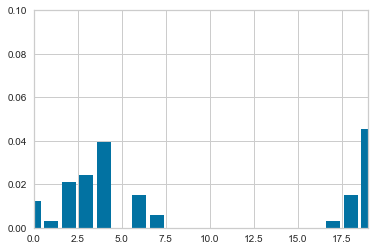

In [174]:
#get Feature importance with Permutation Importance 
Classifier.fit(X_train, y_train)
results7 = permutation_importance(Classifier, X_train, y_train, scoring='accuracy')
# get importance
importance7 = results7.importances_mean
# summarize feature importance
for i,v in enumerate(importance7):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance7))], importance7)
pyplot.axis([0,19,0,0.1])
pyplot.show()

In [221]:
#Prepare for proof GA kNN
Features_knn2 = data_ges1.iloc[:, [19,4,3,2,6,18,0,7,17,1]] 
X_train, X_test, y_train, y_test = train_test_split(Features_knn2, RWT_labels, test_size = 0.25, random_state = 20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [222]:
#Proof of GA KNeigbors II

#get scores
Classifier = KNeighborsClassifier(n_neighbors=4, weights= 'uniform', algorithm= 'auto', p=3, )
scores_neigh = cross_val_score(Classifier, X_train, y_train, cv=10)


#check model performance
Classifier.fit(X_train, y_train)
#score_nei = neigh.score(X_test, y_test)
predictions_KN_s = Classifier.predict(X_train)


print("===Score===")
#print(np.mean(score_nei))
scores_neigh 
print(np.mean(scores_neigh))

print("=== Accuracy ===")
print(accuracy_score(y_test, predictions_KN_s))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions_KN_s))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions_KN_s))
print('\n')

===Score===
0.43809523809523804
=== Accuracy ===
0.6818181818181818
=== Confusion Matrix ===
[[28  6]
 [15 17]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.65      0.82      0.73        34
           1       0.74      0.53      0.62        32

    accuracy                           0.68        66
   macro avg       0.70      0.68      0.67        66
weighted avg       0.69      0.68      0.67        66





In [77]:
#Prepare for GA MLP
X_train, X_test, y_train, y_test = train_test_split(RWT_Features, RWT_labels, test_size = 0.25, random_state = 20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test= pd.DataFrame(X_test)
X_train = pd.DataFrame(X_train)

In [78]:
#GA MLP
#defining various steps required for the genetic algorithm
mlp= MLPClassifier( max_iter=1500, random_state= 10, activation= 'relu', solver = 'adam', alpha= 0.0001, batch_size= 200, learning_rate='constant', learning_rate_init=0.099, shuffle= True, beta_1=0.9, n_iter_no_change=9)

def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        mlp.fit(X_train.iloc[:,chromosome],y_train)
        predictions = mlp.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [79]:
#get best result for MLP (animal test)
chromo,score=generations(size=200,n_feat=20,n_parents=100,mutation_rate=0.10,
                     n_gen=38,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
mlp= MLPClassifier( max_iter=1500, random_state= 10, activation= 'relu', solver = 'adam', alpha= 0.0001, batch_size= 200, learning_rate='constant', learning_rate_init=0.099, shuffle= True, beta_1=0.9, n_iter_no_change=9)
scores_mlp = cross_val_score(mlp, X_train, y_train, cv=10)
mlp.fit(X_train.iloc[:,chromo[-1]],y_train)
y_pred = mlp.predict(X_test.iloc[:,chromo[-1]])
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,y_pred)))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

[0.7272727272727273, 0.6818181818181818]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7727272727272727, 0.7727272727272727]
[0.7727272727272727, 0.7727272727272727]
[0.7727272727272727, 0.7727272727272727]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7727272727272727, 0.7727272727272727]
[0.7727272727272727, 0.7727272727272727]
[0.7272727272727273, 0.7272727272727273]
[0.8181818181818182, 0.8181818181818182]
[0.7727272727272727, 0.7727272727272727]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7727272727272727, 0.7727272727272727]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7727272727272727, 0.7727272727272727]
[0.7727272727272727, 0.7727272727272727]
[0.7727272727272727, 0.7727272727272727]
[0.7272727272727273, 0.7272727272727273]
[0.8181818181818182, 0.8181818181818182]
[0.7272727272727

Feature: 0, Score: 0.08788
Feature: 1, Score: 0.13636
Feature: 2, Score: 0.03636
Feature: 3, Score: 0.10303
Feature: 4, Score: 0.06364
Feature: 5, Score: 0.09394
Feature: 6, Score: 0.04848
Feature: 7, Score: 0.02727
Feature: 8, Score: 0.01515
Feature: 9, Score: 0.02424
Feature: 10, Score: 0.06364
Feature: 11, Score: 0.03030
Feature: 12, Score: 0.01515
Feature: 13, Score: 0.03333
Feature: 14, Score: 0.01212
Feature: 15, Score: 0.05758
Feature: 16, Score: 0.05455
Feature: 17, Score: 0.02727
Feature: 18, Score: 0.01515
Feature: 19, Score: 0.04545


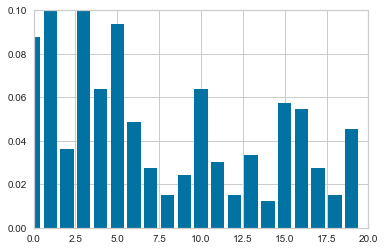

In [80]:
#Get Feature importance with Permuation Importance
mlp.fit(X_train, y_train)
results8 = permutation_importance(mlp, X_train, y_train, scoring='accuracy')
# get importance
importance8 = results8.importances_mean
# summarize feature importance
for i,v in enumerate(importance8):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance8))], importance8)
pyplot.axis([0,20,0,0.1])
pyplot.show()

In [81]:
#Prepare for proof of GA MLP
Features_mlp2 = data_ges1.iloc[:, [1,3,5,0,4,10,15,16,6,19,2,13,11,17,7,8,12,18,14]] 
X_train, X_test, y_train, y_test = train_test_split(Features_mlp2, RWT_labels, test_size = 0.25, random_state = 20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
#Proof of MLPII 

mlp= MLPClassifier( max_iter=1500, random_state= 10, activation= 'relu', solver = 'adam', alpha= 0.0001,  batch_size= 200, learning_rate='constant', learning_rate_init=0.099, shuffle= True, beta_1=0.9, n_iter_no_change=9)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print("=== Accuracy ===")
print(accuracy_score(y_test, y_pred))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

=== Accuracy ===
0.6363636363636364
=== Confusion Matrix ===
[[7 3]
 [5 7]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.70      0.58      0.64        12

    accuracy                           0.64        22
   macro avg       0.64      0.64      0.64        22
weighted avg       0.65      0.64      0.64        22





In [83]:
#CV MLP
cv_score = cross_val_score(mlp, X_train, y_train, cv=10)

cv_score

np.mean(cv_score)

# Make cross validated predictions
predictions_CV_mlp2 = cross_val_predict(mlp, X_train, y_train, cv=10)


print("=== Accuracy ===")
print(accuracy_score(y_train, predictions_CV_mlp2))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_train, predictions_CV_mlp2))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_train, predictions_CV_mlp2))
print('\n')

=== Accuracy ===
0.5303030303030303
=== Confusion Matrix ===
[[15 19]
 [12 20]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.56      0.44      0.49        34
           1       0.51      0.62      0.56        32

    accuracy                           0.53        66
   macro avg       0.53      0.53      0.53        66
weighted avg       0.53      0.53      0.53        66





In [102]:
#Prepare for GA SVM (animal test)
X_train, X_test, y_train, y_test = train_test_split(RWT_Features, RWT_labels, test_size = 0.25, random_state = 20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test= pd.DataFrame(X_test)
X_train = pd.DataFrame(X_train)

In [103]:
#GA SVM
#defining various steps required for the genetic algorithm
clf =svm.SVC(kernel = 'linear', C=3, shrinking=True, probability=False, max_iter=100)

def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        clf.fit(X_train.iloc[:,chromosome],y_train)
        predictions = clf.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [104]:
#Get best result for SVM
chromo,score=generations(size=200,n_feat=20,n_parents=100,mutation_rate=0.10,
                     n_gen=38,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
clf =svm.SVC(kernel = 'linear', C=3, shrinking=True, probability=False, max_iter=100)
clf.fit(X_train.iloc[:,chromo[-1]],y_train)
predictions_svm = clf.predict(X_test.iloc[:,chromo[-1]])
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,predictions_svm)))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions_svm))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions_svm))
print('\n')

[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636

Feature: 0, Score: -0.00606
Feature: 1, Score: 0.01212
Feature: 2, Score: 0.00606
Feature: 3, Score: 0.00606
Feature: 4, Score: 0.01818
Feature: 5, Score: 0.00303
Feature: 6, Score: 0.00606
Feature: 7, Score: 0.00909
Feature: 8, Score: 0.02121
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00303
Feature: 11, Score: 0.00303
Feature: 12, Score: 0.00606
Feature: 13, Score: 0.00909
Feature: 14, Score: 0.00909
Feature: 15, Score: 0.00909
Feature: 16, Score: 0.00606
Feature: 17, Score: 0.00909
Feature: 18, Score: 0.00909
Feature: 19, Score: 0.00909


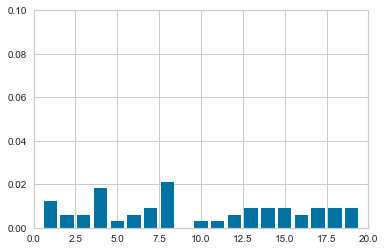

In [105]:
#Get Feature importances with Permutation importance
clf.fit(X_train,y_train)
results9 = permutation_importance(clf, X_train, y_train, scoring='accuracy')
# get importance
importance9 = results9.importances_mean
# summarize feature importance
for i,v in enumerate(importance9):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance9))], importance9)
pyplot.axis([0,20,0,0.1])
pyplot.show()

In [126]:
#prepare for proof of GA SVM
Features_svm2 = data_ges1.iloc[:, [8,4,1,7,13,14,15,17]] 
X_train, X_test, y_train, y_test = train_test_split(Features_svm2, RWT_labels, test_size = 0.25, random_state = 20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [127]:
#Proof of GA Support Vector Machine II

x= X_train
y = y_train
clf =svm.SVC(kernel = 'linear', C=3, shrinking=True, probability=False, max_iter=100)
clf.fit(x,y)
predictions_svm= clf.predict(X_test)
print("=== Accuracy ===")
print(accuracy_score(y_test, predictions_svm))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions_svm))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions_svm))
print('\n')

=== Accuracy ===
0.6363636363636364
=== Confusion Matrix ===
[[ 2  8]
 [ 0 12]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.60      1.00      0.75        12

    accuracy                           0.64        22
   macro avg       0.80      0.60      0.54        22
weighted avg       0.78      0.64      0.56        22





In [128]:
#CV SVM
cv_score = cross_val_score(clf, X_train, y_train, cv=10)

cv_score

np.mean(cv_score)

# Make cross validated predictions
predictions_CV_svm2 = cross_val_predict(clf, X_test, y_test, cv=10)
predictions_CV_svm2

print("=== Accuracy ===")
print(accuracy_score(y_test, predictions_CV_svm2))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions_CV_svm2))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions_CV_svm2))
print('\n')

=== Accuracy ===
0.5454545454545454
=== Confusion Matrix ===
[[ 0 10]
 [ 0 12]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.55      1.00      0.71        12

    accuracy                           0.55        22
   macro avg       0.27      0.50      0.35        22
weighted avg       0.30      0.55      0.39        22





In [135]:
#Prepare for GA GPC
X_train, X_test, y_train, y_test = train_test_split(RWT_Features, RWT_labels, test_size = 0.25, random_state = 20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test= pd.DataFrame(X_test)
X_train = pd.DataFrame(X_train)

In [136]:
#GA GPC (animal test)
#defining various steps required for the genetic algorithm
kernel= 1.0*RBF(1.0)
GPC = GaussianProcessClassifier(kernel=kernel,random_state=0, max_iter_predict=100).fit(X_test, y_test)

def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        GPC.fit(X_train.iloc[:,chromosome],y_train)
        predictions = GPC.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [137]:
#Get best result for GPC
chromo,score=generations(size=200,n_feat=20,n_parents=100,mutation_rate=0.10,
                     n_gen=38,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
kernel= 1.0*RBF(1.0)
GPC = GaussianProcessClassifier(kernel=kernel,random_state=0, max_iter_predict=10).fit(X_test, y_test)
GPC.fit(X_train.iloc[:,chromo[-1]],y_train)
predictions_GP = GPC.predict(X_test.iloc[:,chromo[-1]])
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,predictions_GP)))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions_GP))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions_GP))
print('\n')

[0.6818181818181818, 0.6818181818181818]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7727272727272727, 0.7727272727272727]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7727272727272727, 0.7727272727272727]
[0.7727272727272727, 0.7727272727272727]
[0.7272727272727273, 0.7272727272727273]
[0.7727272727272727, 0.7727272727272727]
[0.7727272727272727, 0.7727272727272727]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7727272727272727, 0.7727272727272727]
[0.8181818181818182, 0.8181818181818182]
[0.7727272727272727, 0.7727272727272727]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7272727272727273, 0.7272727272727273]
[0.7727272727272

Feature: 0, Score: 0.08485
Feature: 1, Score: 0.06667
Feature: 2, Score: 0.06970
Feature: 3, Score: 0.05455
Feature: 4, Score: 0.06364
Feature: 5, Score: 0.01818
Feature: 6, Score: 0.06061
Feature: 7, Score: 0.03636
Feature: 8, Score: 0.06061
Feature: 9, Score: 0.05455
Feature: 10, Score: 0.02727
Feature: 11, Score: 0.02727
Feature: 12, Score: 0.00606
Feature: 13, Score: 0.01212
Feature: 14, Score: 0.00909
Feature: 15, Score: 0.01515
Feature: 16, Score: 0.02121
Feature: 17, Score: 0.05152
Feature: 18, Score: 0.06667
Feature: 19, Score: 0.11212


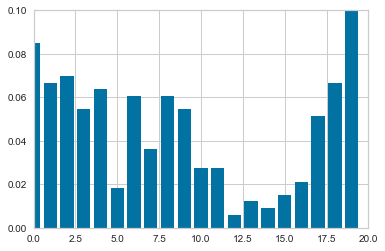

In [138]:
#Get Feature importances with Permutation importance
GPC.fit(X_train,y_train)
results10 = permutation_importance(GPC, X_train, y_train, scoring='accuracy')
# get importance
importance10 = results10.importances_mean
# summarize feature importance
for i,v in enumerate(importance10):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance10))], importance10)
pyplot.axis([0,20,0,0.1])
pyplot.show()

In [139]:
#Prepare for Proof GA GPC
Features_gpc2 = data_ges1.iloc[:, [19,0,2,18,1,4,6,8,9,3,17,7,10,11,16,5,15,13,14,12]] 
X_train, X_test, y_train, y_test = train_test_split(Features_gpc2, RWT_labels, test_size = 0.25, random_state = 20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test= pd.DataFrame(X_test)
X_train = pd.DataFrame(X_train)

In [140]:
#Proof of GA GaussianProcessClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


#with Train-Set
kernel= 1.0*RBF(1.0)
GPC = GaussianProcessClassifier(kernel=kernel,random_state=0, max_iter_predict=10).fit(X_train, y_train)

GPC.score(X_train, y_train)

predictions_GP =GPC.predict(X_test)
print("=== Accuracy ===")
print(accuracy_score(y_test, predictions_GP))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions_GP))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions_GP))
print('\n')
#print(np.mean(GPC.predict(X_test)))


=== Accuracy ===
0.6818181818181818
=== Confusion Matrix ===
[[6 4]
 [3 9]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.69      0.75      0.72        12

    accuracy                           0.68        22
   macro avg       0.68      0.68      0.68        22
weighted avg       0.68      0.68      0.68        22





In [141]:
#CV GPC
cv_score = cross_val_score(GPC, X_train, y_train, cv=10)

cv_score

np.mean(cv_score)

# Make cross validated predictions
predictions_CV_gpc2 = cross_val_predict(GPC, X_test, y_test, cv=10)
predictions_CV_gpc2

print("=== Accuracy ===")
print(accuracy_score(y_test, predictions_CV_gpc2))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions_CV_gpc2))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions_CV_gpc2))
print('\n')

=== Accuracy ===
0.4090909090909091
=== Confusion Matrix ===
[[3 7]
 [6 6]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.33      0.30      0.32        10
           1       0.46      0.50      0.48        12

    accuracy                           0.41        22
   macro avg       0.40      0.40      0.40        22
weighted avg       0.40      0.41      0.41        22





In [168]:
#Prepare for GA XGB 
X_train, X_test, y_train, y_test = train_test_split(RWT_Features, RWT_labels, test_size = 0.25, random_state = 20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test= pd.DataFrame(X_test)
X_train = pd.DataFrame(X_train)

In [169]:
#GA XGB (animal test)
#defining various steps required for the genetic algorithm
model = XGBClassifier(booster='gbtree', eta= 0.01, gamma= 5, max_depth=6, min_child_weight= 4)

def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        model.fit(X_train.iloc[:,chromosome],y_train)
        predictions = model.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [170]:
#get best result for XGB
chromo,score=generations(size=200,n_feat=20,n_parents=100,mutation_rate=0.10,
                     n_gen=38,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model = XGBClassifier(booster='gbtree', eta= 0.01, gamma= 5, max_depth=6, min_child_weight= 4)
model.fit(X_train.iloc[:,chromo[-1]],y_train)
predictions = model.predict(X_test.iloc[:,chromo[-1]])
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,predictions)))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions))
print('\n')

[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636364, 0.6363636363636364]
[0.6363636363636

In [171]:
#Get Feature importance
feature_importances = pd.DataFrame(model.feature_importances_, columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

    importance
6     0.600042
4     0.399958
0     0.000000
1     0.000000
2     0.000000
3     0.000000
5     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000


In [173]:
#Prepare for proof of GA XGB
Features_xgb2 = data_ges1.iloc[:, [6,4]]
X_train, X_test, y_train, y_test = train_test_split(Features_xgb2, RWT_labels, test_size = 0.25, random_state = 20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [174]:
#Proof of GA XGboostII


model = XGBClassifier(booster='gbtree', eta= 0.01, gamma= 5,max_depth=6, min_child_weight= 4)
model.fit(X_train, y_train)
y_pred_xg = model.predict(X_test)
predictions_XG = [round(value) for value in y_pred_xg]

print("=== Accuracy ===")
print(accuracy_score(y_test, predictions_XG))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions_XG))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions_XG))
print('\n')

=== Accuracy ===
0.45454545454545453
=== Confusion Matrix ===
[[10  0]
 [12  0]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        10
           1       0.00      0.00      0.00        12

    accuracy                           0.45        22
   macro avg       0.23      0.50      0.31        22
weighted avg       0.21      0.45      0.28        22





In [175]:
#CV XGB
cv_score = cross_val_score(model, X_train, y_train, cv=10)

cv_score

np.mean(cv_score)

# Make cross validated predictions
predictions_CV_xgb2 = cross_val_predict(model, X_train, y_train, cv=10)
predictions_CV_xgb2

print("=== Accuracy ===")
print(accuracy_score(y_train, predictions_CV_xgb2))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_train, predictions_CV_xgb2))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_train, predictions_CV_xgb2))
print('\n')

=== Accuracy ===
0.5151515151515151
=== Confusion Matrix ===
[[34  0]
 [32  0]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.52      1.00      0.68        34
           1       0.00      0.00      0.00        32

    accuracy                           0.52        66
   macro avg       0.26      0.50      0.34        66
weighted avg       0.27      0.52      0.35        66





In [326]:
#import sorted list for getting psd
data_ges1_sort = pd.read_csv('/Users/niklasgroiss/Desktop/Master HS Aalen/TextMining & Text Analytics /RWT/RWT_sortiert_animals.csv', header = None, sep = ';')
data_ges1_sort = data_ges1_sort.iloc[:,1:]
data

In [348]:
#get psd of important frequencies
freq_19 = data_ges1_sort.iloc[44:,18]
freq_19_mci = data_ges1_sort.iloc[:44,18]
freq_34 = data_ges1_sort.iloc[44:,2] + data_ges1_sort.iloc[44:,3]
freq_34_mci = data_ges1_sort.iloc[:44,2] + data_ges1_sort.iloc[:44,3]
freq_2 = data_ges1_sort.iloc[44:,1]
freq_2_mci = data_ges1_sort.iloc[:44,1]

44    5.512976e-11
45    5.179756e-11
46    1.154893e-10
47    5.400607e-11
48    7.452448e-11
49    4.360837e-11
50    2.715321e-11
51    1.141236e-10
52    1.440635e-10
53    3.709127e-11
54    1.241482e-11
55    1.348798e-10
56    1.956386e-11
57    4.804017e-11
58    1.982771e-11
59    2.605291e-10
60    3.456249e-11
61    9.481407e-11
62    1.118468e-10
63    1.901827e-10
64    4.552093e-11
65    1.506715e-11
66    2.893821e-11
67    5.080462e-10
68    6.933320e-11
69    4.903519e-09
70    3.988452e-11
71    1.733107e-10
72    4.477972e-10
73    1.671523e-10
74    9.052138e-11
75    5.405324e-11
76    6.315799e-11
77    3.649753e-11
78    1.264344e-10
79    1.138188e-10
80    1.349823e-11
81    3.384463e-11
82    7.233647e-11
83    2.366573e-11
84    5.655378e-11
85    6.624601e-11
86    5.878033e-11
87    2.131258e-10
Name: 2, dtype: float64

In [351]:
#Calculate mean and SD
print("mean freq_19:",freq_19.mean()*10**11)
print("mean freq_34:",freq_34.mean()*10**11)
print("mean freq_2:",freq_2.mean()*10**11)

print("mean freq_19_mci:",freq_19_mci.mean()*10**11)
print("mean freq_34_mci:",freq_34_mci.mean()*10**11)
print("mean freq_2_mci:",freq_2_mci.mean()*10**11)

#sd
print("sd freq_19:",freq_19.std()*10**11)
print("sd freq_34:",freq_34.std()*10**11)
print("sd freq_2:",freq_2.std()*10**11)

print("sd freq_19_mci:",freq_19_mci.std()*10**11)
print("sd freq_34_mci:",freq_34_mci.std()*10**11)
print("sd freq_2_mci:",freq_2_mci.std()*10**11)

mean freq_19: 0.15957566843145354
mean freq_34: 16.20648989559948
mean freq_2: 20.601710680738993
mean freq_19_mci: 0.06766305255295003
mean freq_34_mci: 6.389799096069425
mean freq_2_mci: 7.407084219522016
sd freq_19: 0.5423571843208063
sd freq_34: 54.74752366468123
sd freq_2: 73.17644685583038
sd freq_19_mci: 0.05628444502701076
sd freq_34_mci: 4.405346992773214
sd freq_2_mci: 4.866771356474516


In [354]:
cohensd_freq_19 = cohensd(0.159,0.068,0.542,0.056,44,44)
cohensd_freq_34 = cohensd(16.206,6.390, 54.748, 4.405,44,44)
cohensd_freq_2 = cohensd(20.602,7.407,73.176,4.867,44,44)
print(cohensd_freq_19)
print(cohensd_freq_34)
print(cohensd_freq_2)

0.25444695101601233